<a href="https://colab.research.google.com/github/Andarsan/game/blob/main/%D0%9F%D1%80%D0%B8%D1%81%D1%82%D0%B0%D0%B2%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Игры и платформы
Интернет-магазине «Стримчик», продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).
* нужно выявить определяющие успешность игры закономерности?
* возможно это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании

|||
|:-|:-|
|name| — название игры|
|platform| — платформа|
|year_of_release| — год выпуска|
|genre| — жанр игры|
|na_sales| — продажи в Северной Америке (миллионы проданных копий)|
|eu_sales| — продажи в Европе (миллионы проданных копий)|
|jp_sales| — продажи в Японии (миллионы проданных копий)|
|other_sales| — продажи в других странах (миллионы проданных копий)|
|critic_Score| — оценка критиков (максимум 100)|
|user_Score| — оценка пользователей (максимум 10)|
|rating| — рейтинг от организации ESRB (англ. Entertainment Software rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.|

## Откроим файл с данными и изучите общую информацию.


* импортируем инструменты

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import random
import seaborn as sns
import scipy.stats as st
try:
    from google.colab import drive
    drive.mount('/content/drive')
except Exception as ex:
    template = "An exception of type {0} occurred. Arguments:\n{1!r}"
    message = template.format(type(ex).__name__, ex.args)
    print(message)
import os

Mounted at /content/drive


In [2]:
pth1 = '/datasets'#/ferma_main.csv'
pth2 = '/content/drive/MyDrive/Colab Notebooks/all_project'#/ferma_main.csv'
pth3 = 'C:/Users/andar/Downloads'
if os.path.exists(pth1):
  pth = pth1
elif os.path.exists(pth2):
  pth = pth2
elif os.path.exists(pth3):
  pth = pth3
else:
  pth = 'Something is wrong'
display(f'рабочий каталог: {pth}')

'рабочий каталог: /content/drive/MyDrive/Colab Notebooks/all_project'

* прочитаем таблицу изучим данные

In [3]:
games = pd.read_csv(pth + '/games.csv')

In [4]:
display(games.head(5))
games.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


* данных не много, есть пустые значения, тип данных в некоторых полях поменяем

## Подготовим данные.

### переименуем столбики

In [5]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

* теперь все имена с маленькими буквами

### преобразуем данные

#### `name`

In [6]:
display(games['name'].dtype)
display(games['name'].isna().sum())
display(games['name'].head(5))
display(games[games['name'].isna()])

dtype('O')

2

,name
0,Wii Sports
1,Super Mario Bros.
2,Mario Kart Wii
3,Wii Sports Resort
4,Pokemon Red/Pokemon Blue


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


* есть 2 пустых, оставим их не будем убирать там хоть есть платформа год какая то сумма продаж, тип данных оставим

In [7]:
games[['name','platform','year_of_release']].duplicated().sum()

2

* есть 2 дубликата одна и та же игра в том же году на одной и той же платформе я думаю что удалим

In [8]:
games.drop_duplicates(subset=['name','platform','year_of_release'],keep='first',inplace=True)
games[['name','platform','year_of_release']].duplicated().sum()

0

* удалили

#### `platform`

In [9]:
display(games['platform'].isna().sum())
display(games['platform'].head(5))

0

,platform
0,Wii
1,NES
2,Wii
3,Wii
4,GB


* пустых нету все отлично, поменяем тип данных на категории

#### `year_of_release`

In [10]:
display(games['year_of_release'].dtype)
display(games['year_of_release'].isna().sum())
display(games['year_of_release'].unique())

dtype('float64')

269

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

* есть пустые значения, тип данных поменяем на целые числа

In [11]:
games['year_of_release'] = games['year_of_release'].astype('Int64')
display(games['year_of_release'].unique())
games['year_of_release'].dtype

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

Int64Dtype()

* тип данных поменяли, в пустые значения вставим медианы
* год сделали маленьким целым числом

In [12]:
# пустое значение по каждому году будет заменять в
# функции _df_year_median (см. ниже)
_df_year_median = games.groupby('platform')['year_of_release'].median()
# функция для записи медианного значения в пустое games['year_of_release']
def def_median(row):
    if pd.isna(row['year_of_release']):
        for x in _df_year_median.index:
            if row['platform'] == x:
                return int(_df_year_median[x])
    return row['year_of_release']
# произведём запись в games['year_of_release'] медианного значения
games['year_of_release'] = games.apply(def_median, axis=1)
display(games['year_of_release'].unique())
games['year_of_release'].dtype

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

dtype('int64')

* медианный год по игре выпущенной для этой платформы
* может это не важно но не хочется терять для анализа другие данные

#### `genre`

In [13]:
display(games[games['genre'].isna()])
games['genre'].dtype

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


dtype('O')

* есть одно пустое значение но в ней есть другая информация оставим её без изменений

#### `na_sales`

In [14]:
display(games['na_sales'].dtype)
display(games['na_sales'].isna().sum())
games['na_sales'].head(5)

dtype('float64')

0

,na_sales
0,41.36
1,29.08
2,15.68
3,15.61
4,11.27


* пустых значений нет, тип данных поменяем на целые числа

In [15]:
games['na_sales'] = (games['na_sales']*1000000).astype('int64')
display(games['na_sales'].head(5))
games['na_sales'].dtype

,na_sales
0,41360000
1,29080000
2,15680000
3,15610000
4,11270000


dtype('int64')

* тип данных поменяли, будет меньше места занимать

#### `eu_sales`

In [16]:
display(games['eu_sales'].dtype)
display(games['eu_sales'].isna().sum())
display(games['eu_sales'].head(5))

dtype('float64')

0

,eu_sales
0,28.96
1,3.58
2,12.76
3,10.93
4,8.89


* пустых значений нет, тип данных поменяем на целые числа

In [17]:
games['eu_sales'] = (games['eu_sales']*1000000).astype('int64')
display(games['eu_sales'].head(5))
games['eu_sales'].dtype

,eu_sales
0,28960000
1,3580000
2,12760000
3,10930000
4,8890000


dtype('int64')

* тип данных поменяли, будет меньше места занимать

#### `jp_sales`

In [18]:
display(games['jp_sales'].dtype)
display(games['jp_sales'].isna().sum())
games['jp_sales'].head(5)

dtype('float64')

0

,jp_sales
0,3.77
1,6.81
2,3.79
3,3.28
4,10.22


* пустых значений нет, тип данных поменяем на целые числа

In [19]:
games['jp_sales'].memory_usage()

267408

In [20]:
games['jp_sales'] = (games['jp_sales']*1000000).astype('int64')
display(games['jp_sales'].head(5))
games['jp_sales'].dtype

,jp_sales
0,3770000
1,6810000
2,3790000
3,3280000
4,10220000


dtype('int64')

* тип данных поменяли, будет меньше места занимать

In [21]:
games['jp_sales'].memory_usage()

267408

#### `other_sales`

In [22]:
display(games['other_sales'].dtype)
display(games['other_sales'].isna().sum())
games['other_sales'].head(5)

dtype('float64')

0

,other_sales
0,8.45
1,0.77
2,3.29
3,2.95
4,1.00


* тип данных поменяли, будет меньше места занимать

In [23]:
games['other_sales'] = (games['other_sales']*1000000).astype('int64')
display(games['other_sales'].head(5))
games['other_sales'].dtype

,other_sales
0,8450000
1,770000
2,3290000
3,2950000
4,1000000


dtype('int64')

* тип данных поменяли, будет меньше места занимать

#### `critic_score`

In [24]:
display(games['critic_score'].dtype)
display(games['critic_score'].isna().sum())
display(games['critic_score'].unique())

dtype('float64')

8577

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

* есть пустые значения, тип данных поменяем на целые числа
* пустые можно заменять из пользовательского рейтинга, но я не буду так-ка мы будем сравнивать эти два рейтинга между собой.


In [25]:
games['critic_score'] = games['critic_score'].astype(pd.Int64Dtype())
display(games['critic_score'].unique())
games['critic_score'].dtype

<IntegerArray>
[  76, <NA>,   82,   80,   89,   58,   87,   91,   61,   97,   95,   77,   88,
   83,   94,   93,   85,   86,   98,   96,   90,   84,   73,   74,   78,   92,
   71,   72,   68,   62,   49,   67,   81,   66,   56,   79,   70,   59,   64,
   75,   60,   63,   69,   50,   25,   42,   44,   55,   48,   57,   29,   47,
   65,   54,   20,   53,   37,   38,   33,   52,   30,   32,   43,   45,   51,
   40,   46,   39,   34,   35,   41,   36,   28,   31,   27,   26,   19,   23,
   24,   21,   17,   22,   13]
Length: 83, dtype: Int64

Int64Dtype()

* тип данных поменяли, будет меньше места занимать
* пустые оставили

#### `user_score`

In [26]:
display(games['user_score'].dtype)
display(games['user_score'].isna().sum())
display(games['user_score'].unique())

dtype('O')

6700

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

* есть пустые значения и (`tbd` - рейтинг не определён), тип данных поменяем на целые числа (`tbd` - поменяем на `<NA>`)
* пустые можно заменять из авторитетного рейтинга, но я не буду так-ка мы будем сравнивать эти два рейтинга между собой.

In [27]:
def to_Int64(x):
    try:
        return int(pd.to_numeric(x)*10)
    except:
        return np.nan

In [28]:
games['user_score'] = games['user_score'].apply(to_Int64).astype(pd.Int64Dtype())
display(games['user_score'].unique())
display(games['user_score'].isna().sum())
games['user_score'].dtype

<IntegerArray>
[  80, <NA>,   83,   85,   66,   84,   86,   77,   63,   74,   82,   90,   79,
   81,   87,   71,   34,   53,   48,   32,   89,   64,   78,   75,   26,   72,
   92,   70,   73,   43,   76,   57,   50,   91,   65,   88,   69,   94,   68,
   61,   67,   54,   40,   49,   45,   93,   62,   42,   60,   37,   41,   58,
   56,   55,   44,   46,   59,   39,   31,   29,   52,   33,   47,   51,   35,
   25,   19,   30,   27,   22,   20,   95,   21,   36,   28,   18,   38,    0,
   16,   96,   24,   17,   11,    3,   15,    7,   12,   23,    5,   13,    2,
    6,   14,    9,   10,   97]
Length: 96, dtype: Int64

9124

Int64Dtype()

* тип данных поменяли, будет меньше места занимать
* пустые оставили
* tbd - поменяем на `<NA>`

#### `rating `

In [29]:
display(games['rating'].isna().sum())
games['rating'].unique()

6765

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

* пустых значений много но мне взять их неоткуда рейтинг неизвестен поменяем формат данных на категории

### посчитаим суммарные продажи во всех регионах и запишим их в отдельный столбец `sum`

In [30]:
games['sum'] = games.apply(lambda x: (x['na_sales'] + x['eu_sales'] + x['jp_sales'] + x['other_sales']), axis=1)
display(games['sum'].min(),games['sum'].max())
display(games.head(5))

0

82540000

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum
0,Wii Sports,Wii,2006,Sports,41360000,28960000,3770000,8450000,76,80,E,82540000
1,Super Mario Bros.,NES,1985,Platform,29080000,3580000,6810000,770000,<NA>,<NA>,NaN,40240000
2,Mario Kart Wii,Wii,2008,Racing,15680000,12760000,3790000,3290000,82,83,E,35520000
3,Wii Sports Resort,Wii,2009,Sports,15610000,10930000,3280000,2950000,80,80,E,32770000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11270000,8890000,10220000,1000000,<NA>,<NA>,NaN,31380000


In [31]:
games[games['sum'] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum
16676,G1 Jockey 4 2008,PS3,2008,Sports,0,0,0,0,<NA>,<NA>,NaN,0
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0,0,0,0,<NA>,<NA>,NaN,0


* всё удачно сумировалось, странно что продажи по этим играм нуливые, данные не все!

In [32]:
display(games['rating'].isna().sum())
display(games[games['rating'].isna()]['user_score'].sum())
display(games[games['rating'].isna()]['critic_score'].sum())

6765

5990

5695

## Проведём исследовательский анализ данных.

### посмотрим, сколько игр выпускалось в разные годы

In [33]:
_games = games.groupby(['name','year_of_release']).agg({'name':['first'], 'year_of_release':['first']})
_games.reset_index(inplace= False)
_games.columns = ['name','year']

In [34]:
_games.head(5)

,,name,year
name,year_of_release,,
Beyblade Burst,2016,Beyblade Burst,2016
Fire Emblem Fates,2015,Fire Emblem Fates,2015
Frozen: Olaf's Quest,2013,Frozen: Olaf's Quest,2013
Haikyu!! Cross Team Match!,2016,Haikyu!! Cross Team Match!,2016
Tales of Xillia 2,2012,Tales of Xillia 2,2012


* сгруппировали по имени игры и году получили список

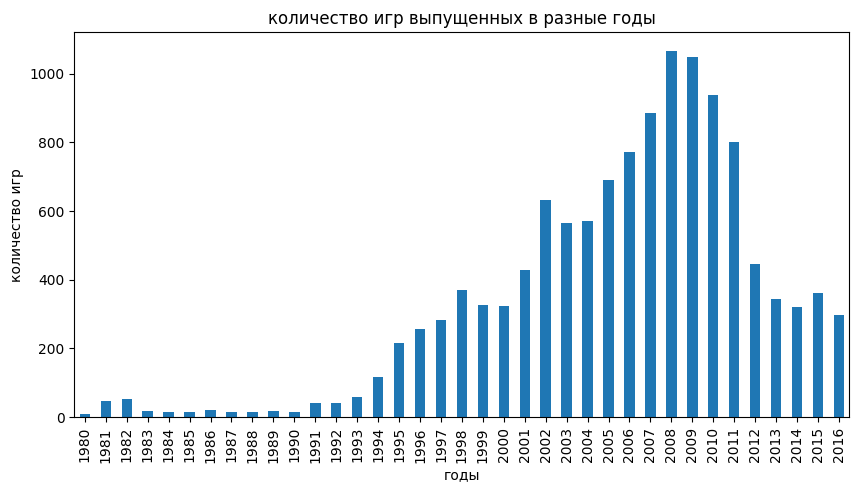

In [35]:
ax = plt.subplots(figsize=(10,5))
ax = _games.groupby('year')['year'].count().plot.bar()
plt.xlabel('годы')
plt.ylabel('количество игр')
plt.title('количество игр выпущенных в разные годы')
plt.show()

* странно что после 2011 года так резко упало количество игр

### посмотрим, как менялись продажи по платформам

#### выберим платформы с наибольшими суммарными продажами и построим распределение по годам

In [36]:
_games = games.groupby(['year_of_release','platform']).agg({'year_of_release':['first'],'platform':['first'], 'sum':['sum']})
_games.reset_index(inplace= True)
_games.columns = ['_year','_platform','year','platform','sum']
_games = _games.drop(columns=['_year','_platform'])
_games['sum'] = _games['sum']/1000000
_games

,year,platform,sum
0,1980,2600,11.380000
1,1981,2600,35.680000
2,1982,2600,39.380000
3,1983,2600,5.840000
4,1983,NES,10.960000
...,...,...,...
233,2016,PSV,4.250000
234,2016,Wii,0.180000
235,2016,WiiU,4.600000
236,2016,X360,1.520000


* сгруппировали по году платформе и посчитали сумму продаж игр, перевидём sum в миллион шт.
* далее посмотри на общую картину по продажем

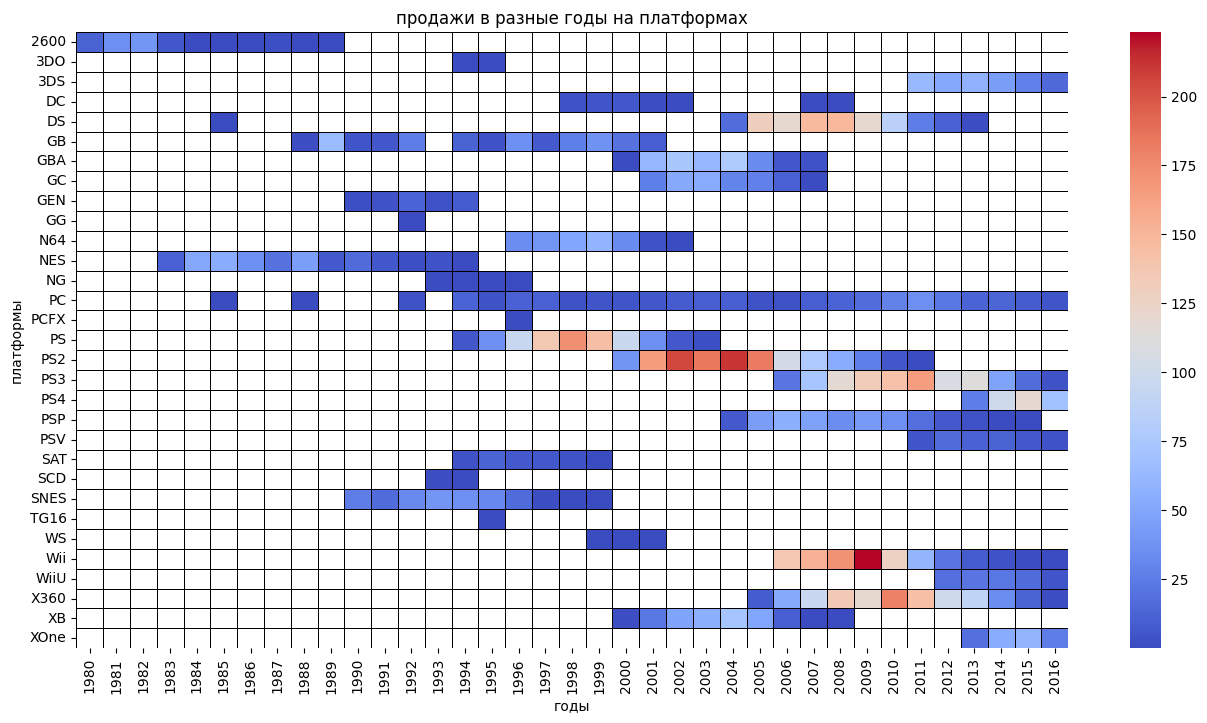

In [37]:
df_pivot = pd.pivot_table(_games,  values='sum', index='platform', columns='year')
fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(df_pivot, cmap= 'coolwarm',  linewidths=0.5, linecolor='black')
plt.xlabel('годы')
plt.ylabel('платформы')
plt.title('продажи в разные годы на платформах')
plt.show()

* далее посмотрим самые продоваемые по годам ТОП - 10

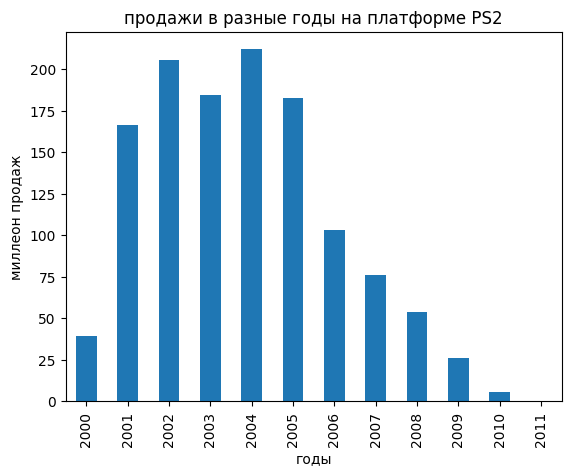

'количество продаж за весь периуд составил: 1 255 769 992 шт.'

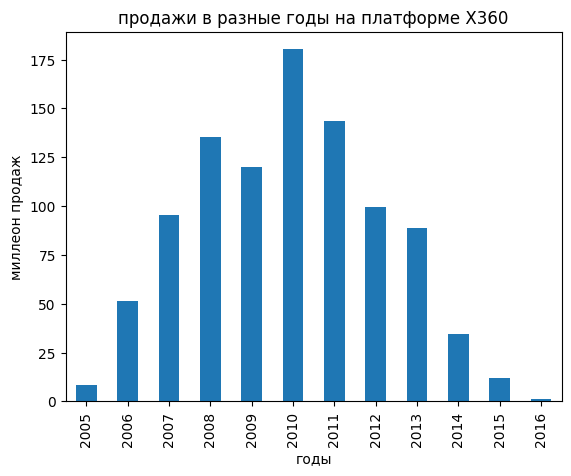

'количество продаж за весь периуд составил: 971 419 999 шт.'

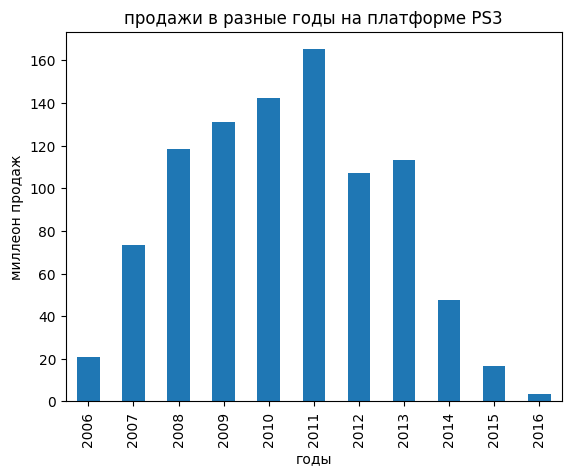

'количество продаж за весь периуд составил: 939 639 995 шт.'

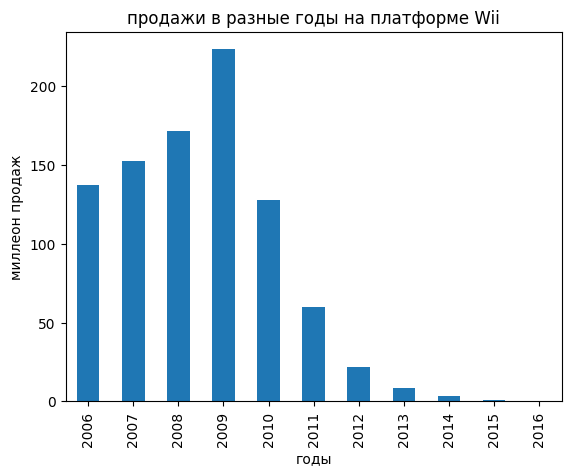

'количество продаж за весь периуд составил: 907 509 996 шт.'

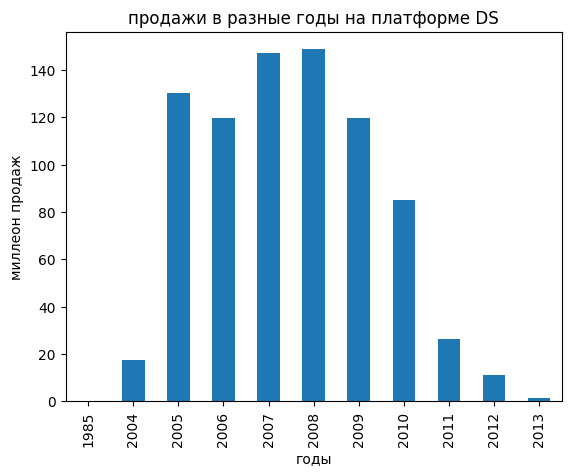

'количество продаж за весь периуд составил: 806 120 000 шт.'

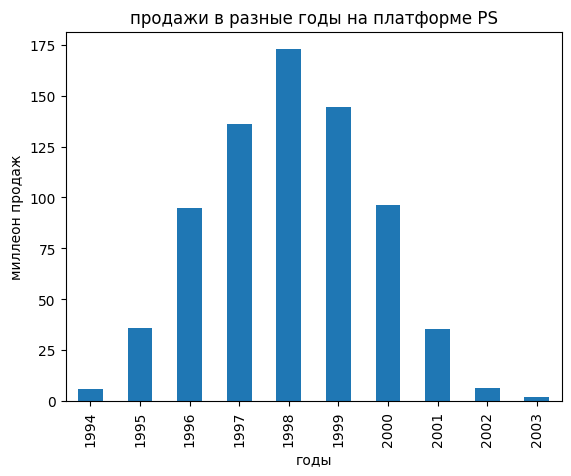

'количество продаж за весь периуд составил: 730 859 994 шт.'

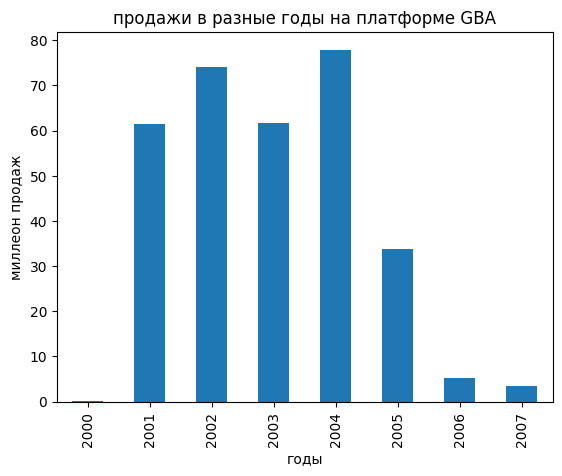

'количество продаж за весь периуд составил: 317 849 999 шт.'

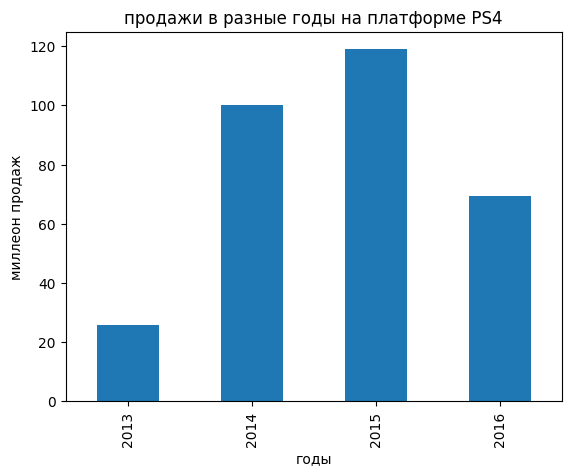

'количество продаж за весь периуд составил: 314 139 997 шт.'

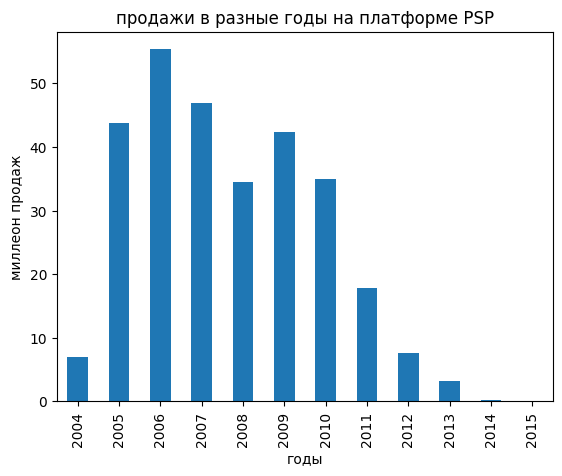

'количество продаж за весь периуд составил: 294 050 000 шт.'

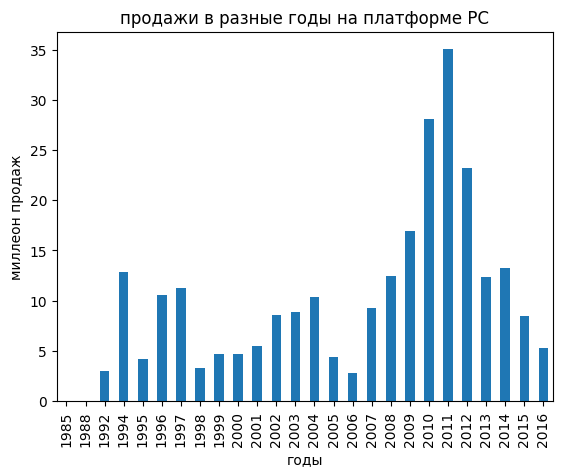

'количество продаж за весь периуд составил: 259 519 998 шт.'

In [38]:
_g_platform = _games.groupby('platform')['sum'].sum().sort_values(ascending=False)
for i in range(0, 10):
  ax = _games.query('platform == @_g_platform.index[@i]').groupby('year')['sum'].sum().plot.bar()
  plt.xlabel('годы')
  plt.ylabel('миллеон продаж')
  plt.title(f'продажи в разные годы на платформе {_g_platform.index[i]}')
  plt.show()
  _s = int(_games.query('platform == @_g_platform.index[@i]')['sum'].sum()*1000000)
  display(f'количество продаж за весь периуд составил: {_s:_} шт.'.replace("_", " "))

#### посмотрим за какой характерный срок появляются новые и исчезают старые платформы

* далее исключим 2016 год так как платформа еще живы и посчитаем минимальный максимальный год, отнимем получим разницу построим график

,year_min,year_max,live
platform,,,
2600,1980,1989,9
NES,1983,1994,11
DS,1985,2013,28
PC,1985,2015,30
GB,1988,2001,13
SNES,1990,1999,9
GEN,1990,1994,4
GG,1992,1992,0
SCD,1993,1994,1


,live
count,31.000000
mean,7.322581
std,6.949279
min,0.000000
25%,2.500000
50%,6.000000
75%,9.500000
max,30.000000


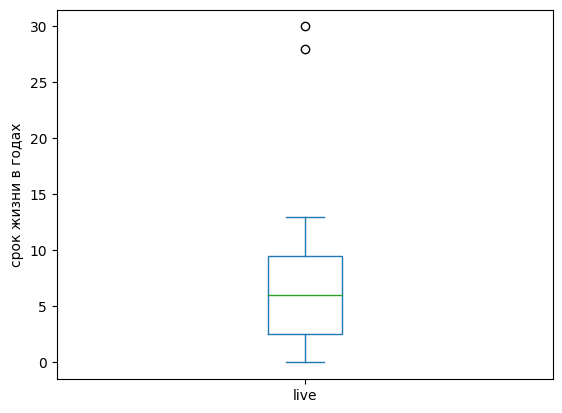

In [39]:
_df_games_live = _games.query('year != 2016').groupby(['platform']).agg({'year':['min','max']})
_df_games_live.reset_index()
_df_games_live.columns = ['year_min','year_max']
_df_games_live['live'] =_df_games_live['year_max'] - _df_games_live['year_min']
display(_df_games_live.sort_values(by='year_min'))
ax = _df_games_live['live'].plot.box() #
plt.ylabel('срок жизни в годах')
_df_games_live['live'].describe()


* характерный срок жизни платформы довольно разнообразный от 2,5 до 9.5 лет
* далее посмотрим как часто появляются новые платформы

,year_min
year_min,
1980,1
1983,1
1985,2
1988,1
1990,2
1992,1
1993,2
1994,3
1995,1


,year_min
count,20.000000
mean,1.550000
std,0.686333
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,3.000000


Text(0, 0.5, 'рождение платформ')

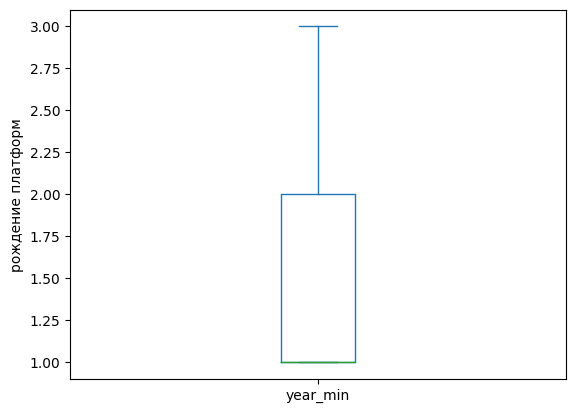

In [40]:
display(_df_games_live.groupby('year_min')['year_min'].count())
display(_df_games_live.groupby('year_min')['year_min'].count().describe())
ax = _df_games_live.groupby('year_min')['year_min'].count().plot.box() #
plt.ylabel('рождение платформ')

* каждый год обязательно появляется хотя бы одна платформа, в среднем каждые два года появляется 3 платформы

### Возьмём данные за 10 лет.

* возьмем данный за 3 года потому что 10 лет это максимальный срок жизни платформы не учитывая конечно некоторые выбросы

In [41]:
_g = _games.groupby(['year','platform']).agg({'year':['first'],'platform':['first'],'sum':['sum']})
_g.reset_index(inplace= True)
_g.columns =['_year','_platform','year','platform','sum']
_g = _g.drop(columns=['_year','_platform'],axis=1)
display(_g.sort_values(by='sum'))

,year,platform,sum
146,2007,DC,0.020000
41,1994,3DO,0.020000
8,1985,DS,0.020000
18,1988,PC,0.030000
63,1996,PCFX,0.030000
...,...,...,...
132,2005,PS2,182.869999
119,2003,PS2,184.310000
113,2002,PS2,205.380000
125,2004,PS2,211.809998


* данные за все года и по всем платформам посчитали количество игр

In [42]:
_g.query('year == 2016')['platform'].unique()

array(['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne'],
      dtype=object)

* cписок всех платформ которые остались в 2016 году

In [43]:
_l = list(_g.query('year == 2016')['platform'].unique())
display(_l)# список платформ оставшихся на рэнки в 2016
_g = _g.query('(platform in @_l) and year >= 2006')[['platform','year','sum']] # список всех лет по платформам которые остались в 2016 году
_g

['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

,platform,year,sum
139,PC,2006,2.850000
141,PS3,2006,20.960000
143,Wii,2006,137.150000
144,X360,2006,51.620000
150,PC,2007,9.280000
...,...,...,...
233,PSV,2016,4.250000
234,Wii,2016,0.180000
235,WiiU,2016,4.600000
236,X360,2016,1.520000


* `_g` список продаж всех лет по платформам которые остались в 2016 году

#### посмотрим на платформы которые лидируют по продажам, растут или падают

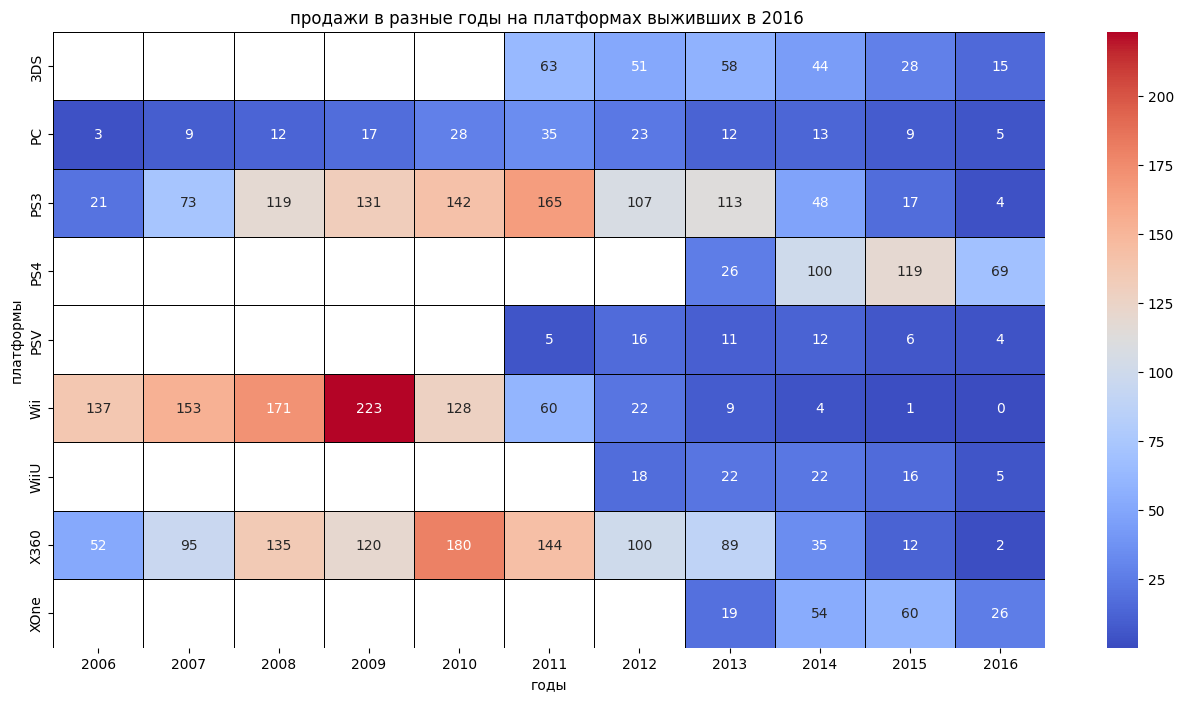

In [44]:
df_pivot = pd.pivot_table(_g,  values='sum', index='platform', columns='year')
fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(df_pivot, cmap= 'coolwarm',  linewidths=0.5, linecolor='black', annot = True, fmt=".0f")
plt.xlabel('годы')
plt.ylabel('платформы')
plt.title('продажи в разные годы на платформах выживших в 2016 ')
plt.show()

* видно, что происходит с продажами за последние 10 лет на платформах, которые остались на рынке в 2016 году.
* все платформы показывают снижение продаж, можно зделать вывод что люди пиристают покупать игры
* похоже в 2017 году Wii перестанет существовать


####  посмотрим на количество новых игр за последние три года и зделаем анализ

* можно предположить что игры стали дороже и их меньше покупают, если это так то посмотрим на количество новых игр за последние десять лет и зделаем анализ

In [45]:
_g_count = games.groupby(['year_of_release','platform']).agg({'year_of_release':['first'],'platform':['first','count']})
_g_count.reset_index(inplace= True)
_g_count.columns = ['_year','_platform','year','platform','sum']
_g_count = _g_count.drop(columns=['_year','_platform'])
_g_count

,year,platform,sum
0,1980,2600,9
1,1981,2600,46
2,1982,2600,53
3,1983,2600,11
4,1983,NES,6
...,...,...,...
233,2016,PSV,85
234,2016,Wii,1
235,2016,WiiU,14
236,2016,X360,13


In [46]:
_l = list(_g_count.query('year >= 2014')['platform'].unique())
display(_l)# список платформ оставшихся на рэнки в 2016
_g = _g_count.query('(platform in @_l) and year >= 2014')[['platform','year','sum']] # список всех лет по платформам которые остались в 2016 году
_g

['3DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

,platform,year,sum
209,3DS,2014,80
210,PC,2014,47
211,PS3,2014,108
212,PS4,2014,75
213,PSP,2014,10
214,PSV,2014,101
215,Wii,2014,6
216,WiiU,2014,31
217,X360,2014,63
218,XOne,2014,61


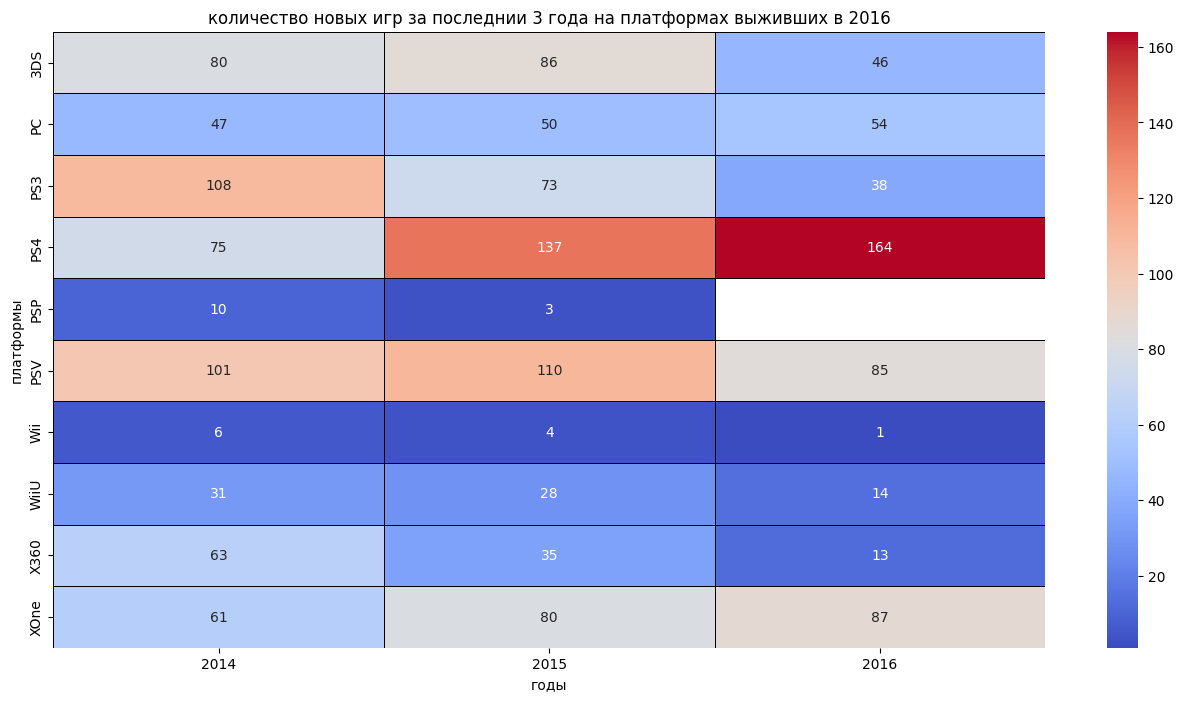

In [47]:
df_pivot = pd.pivot_table(_g,  values='sum', index='platform', columns='year')
fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(df_pivot, cmap= 'coolwarm',  linewidths=0.5, linecolor='black', annot = True, fmt=".0f")
plt.xlabel('годы')
plt.ylabel('платформы')
plt.title('количество новых игр за последнии 3 года на платформах выживших в 2016')
plt.show()

* видно, что происходит с новыми играми за последние 3 года на платформах, которые остались на рынке в 2016 году.
* типерь видно что на некоторых платформах появляется больше игр:
* 1 - место по PS4
* 2 - место XOne
* 3 - место PC
* остальные платформы показывают снижение продаж
* и похоже в 2017 году Wii точно перестанет существовать!

### Возьмём данные за 2014 по 2016

In [48]:
_g_sum_2014 = _games.query('year >= 2014').groupby(['platform'])['sum'].sum()
_g_sum_2014

,sum
platform,
3DS,86.680000
PC,27.050000
PS3,68.179999
PS4,288.149997
PSP,0.360000
PSV,22.660000
Wii,5.070000
WiiU,42.980000
X360,48.220000


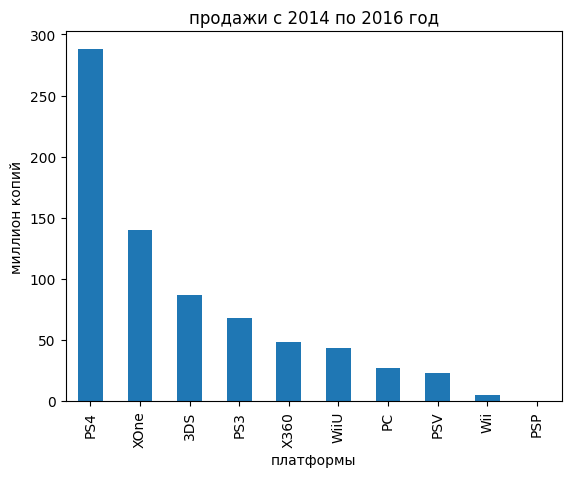

In [49]:
ax = _g_sum_2014.sort_values(ascending=False).plot.bar()
plt.title('продажи с 2014 по 2016 год')
plt.xlabel('платформы')
plt.ylabel('миллион копий')
plt.show()

* здесь можно сделать вывод каких игр больше всего продали в периуд с 2014 по 2016 год.

### Глобальные продажи игр в разбивке по платформам.

In [50]:
_g

,platform,year,sum
209,3DS,2014,80
210,PC,2014,47
211,PS3,2014,108
212,PS4,2014,75
213,PSP,2014,10
214,PSV,2014,101
215,Wii,2014,6
216,WiiU,2014,31
217,X360,2014,63
218,XOne,2014,61


Text(0, 0.5, 'платформы')

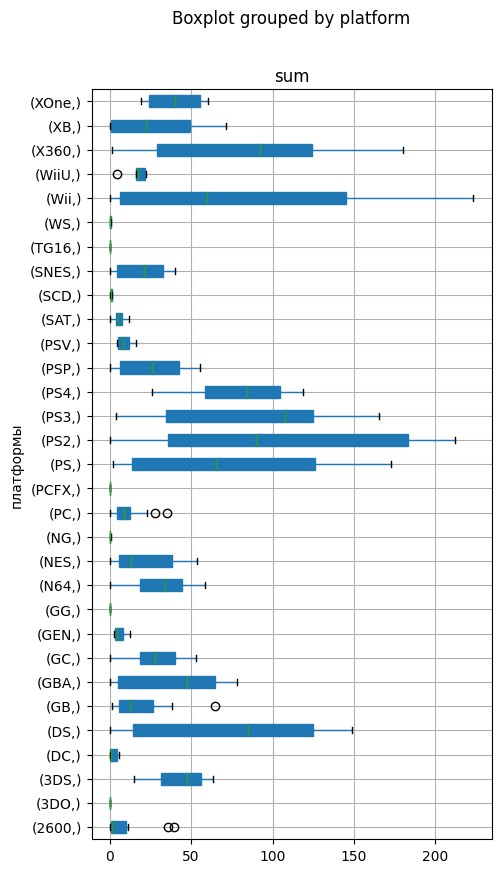

In [51]:
boxplot = _games.boxplot(vert=0, column=['sum'],patch_artist=True,figsize=(5, 10), by = ['platform'])
plt.ylabel('платформы')

* видно, что в разные годы количество продаж очень отличались у платформ
* длинные ящики говорят а долгой и счастливой жизни платформы


<div class="alert alert-info"> <b>Комментарии студента:</b>
Внизу разбил на две группы с высокими и низкими продажами по медиане
</div>


In [52]:
_m = _games.query('year >= 2014').groupby('platform')['sum'].median()
_m_median = _m.median()
_m_min =[]
_m_max =[]
for i in _m.index:
    if _m_median >= _m.loc[i]:
        _m_min.append(i)
    else:
        _m_max.append(i)
display(_m_min,_m_max)

['PC', 'PSP', 'PSV', 'Wii', 'X360']

['3DS', 'PS3', 'PS4', 'WiiU', 'XOne']

''

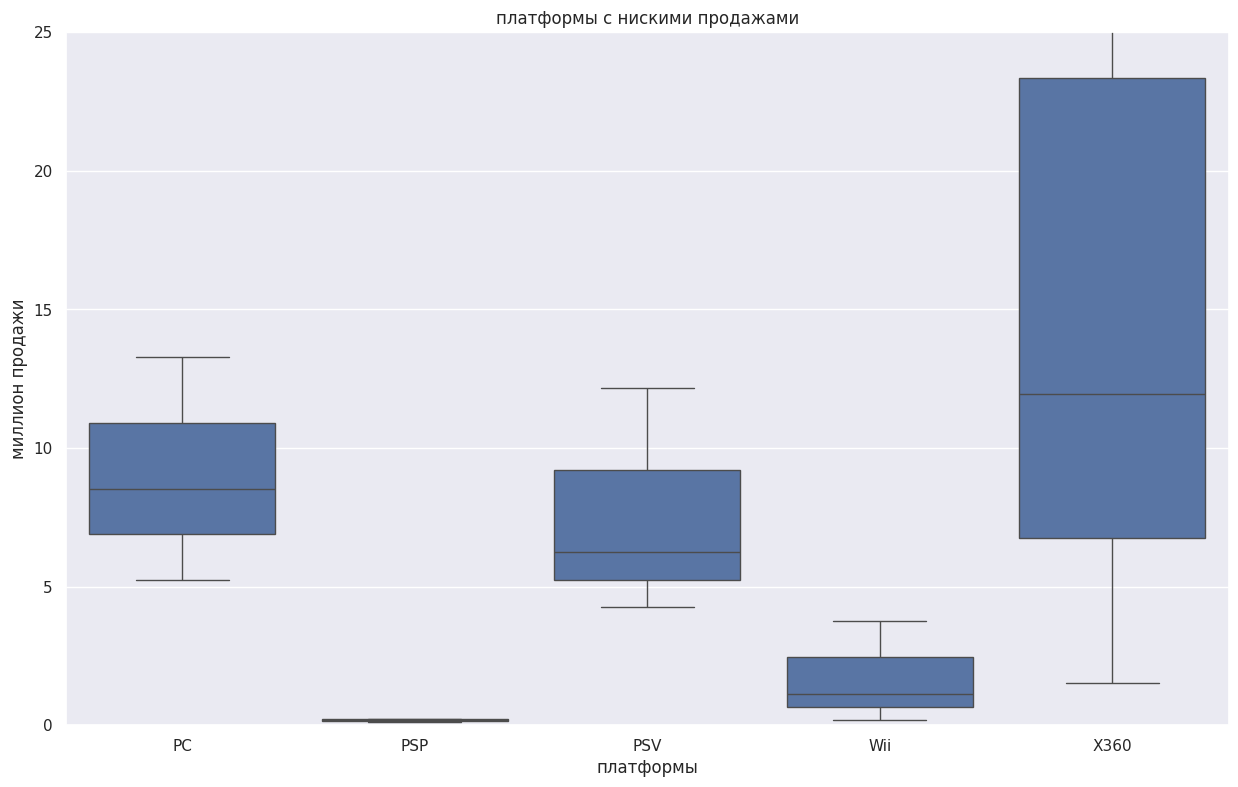

In [53]:
sns.set(rc={'figure.figsize':(15,9)})
_platforms_min = _games.query('year >= 2014').query('platform in @_m_min')
sns.boxplot(data=_platforms_min, x="platform", y="sum", dodge=False, showfliers=False).\
set(ylim=(0,25), title='платформы c нискими продажами', xlabel='платформы', ylabel='миллион продажи')
;

''

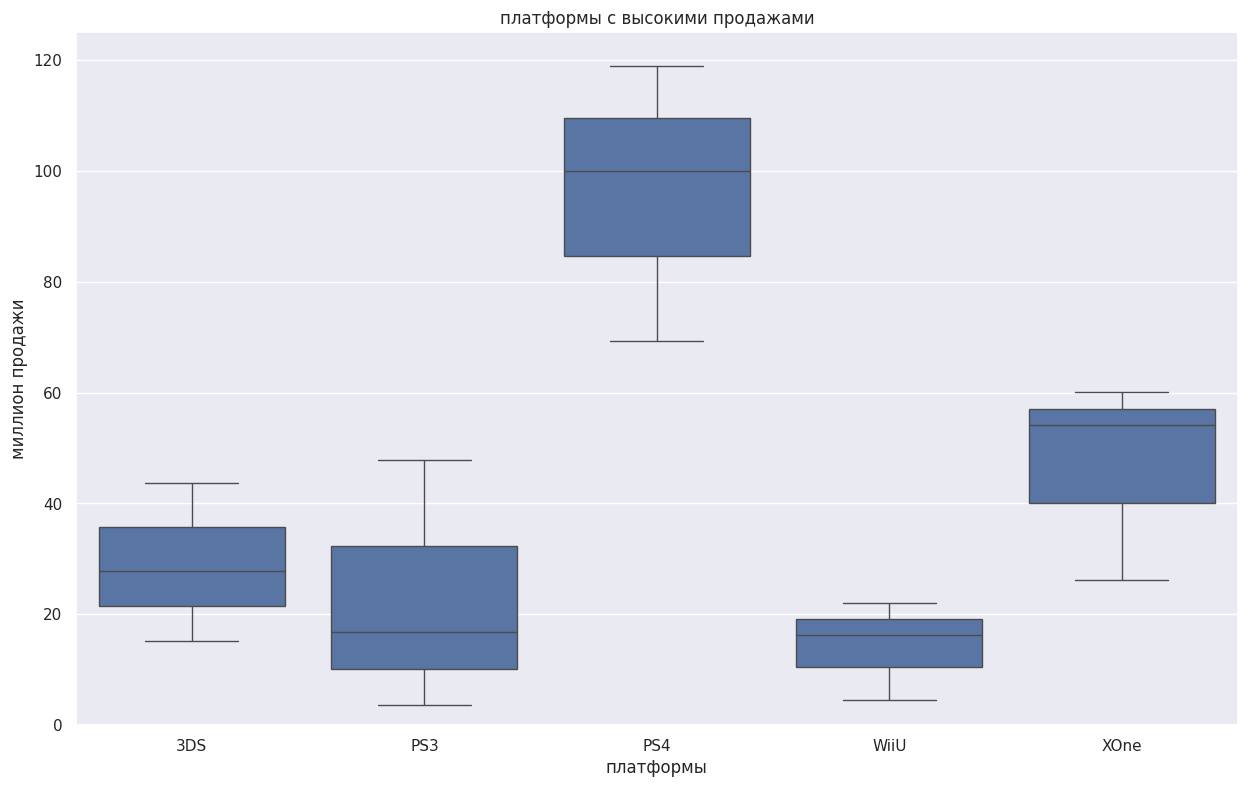

In [54]:
sns.set(rc={'figure.figsize':(15,9)})
_platforms_max = _games.query('year >= 2014').query('platform in @_m_max')
sns.boxplot(data=_platforms_max, x="platform", y="sum", dodge=False, showfliers=False).\
set(ylim=(0,125), title='платформы c высокими продажами', xlabel='платформы', ylabel='миллион продажи')
;

* топ-5 платформ `['PS3', 'X360', 'PS2', 'DS', 'PS4']` за всё время продаж причём PS2 и DS уже в 2016 не продавались

### Посмотрм, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируйте выводы

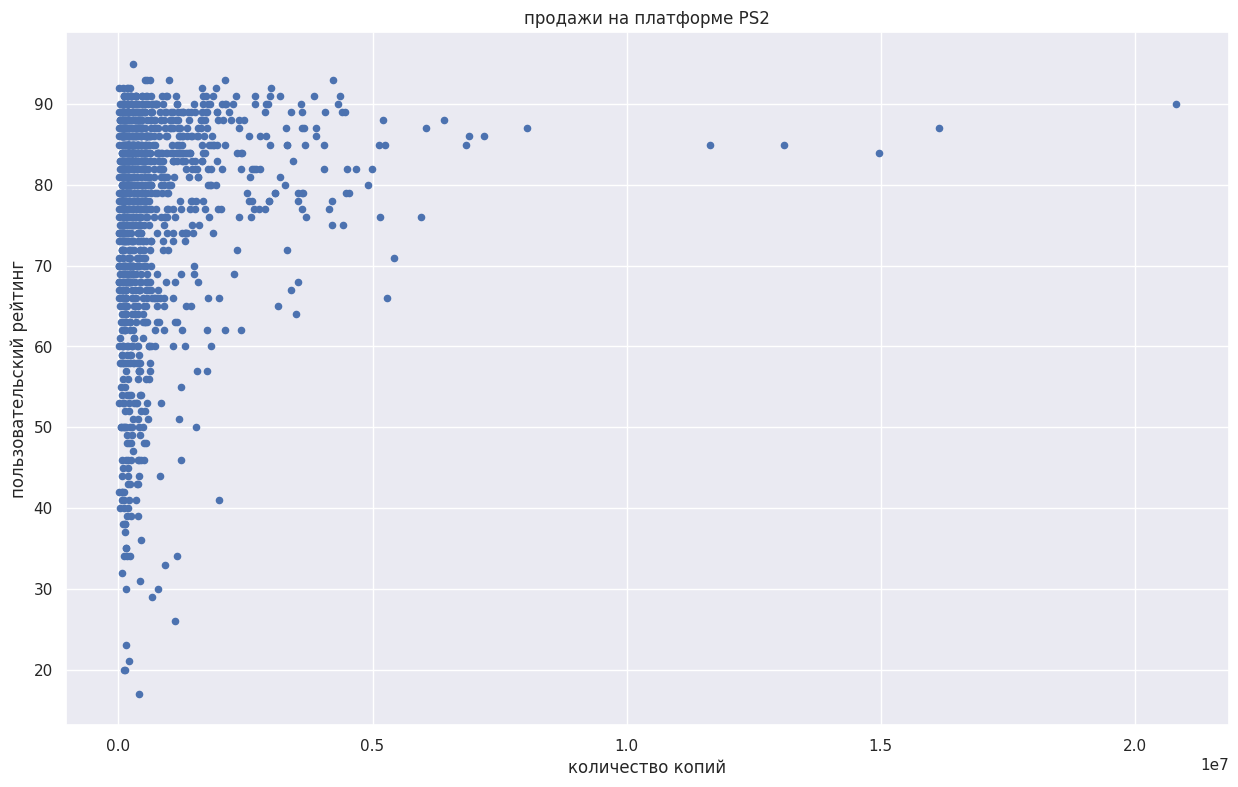

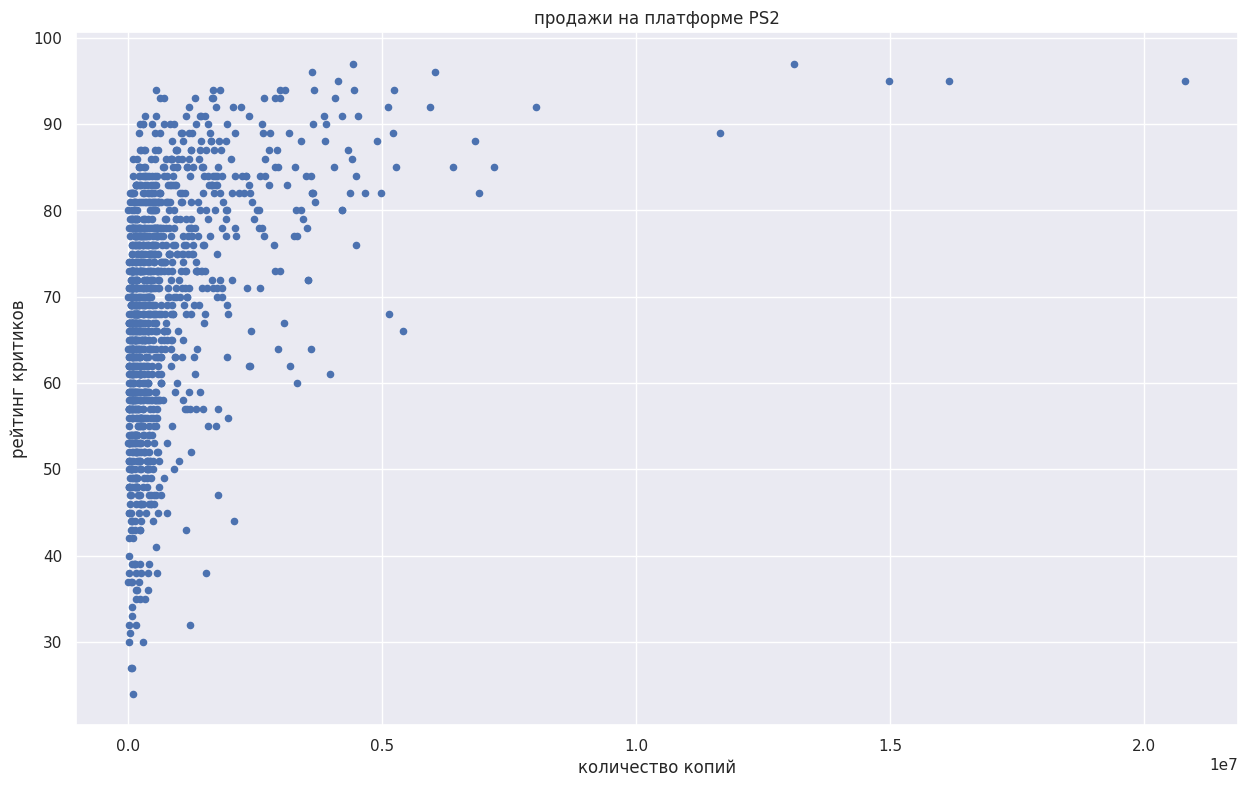

In [55]:
games.query(('platform == "PS2"')).plot.scatter (x = 'sum', y = 'user_score')
plt.title('продажи на платформе PS2')
plt.xlabel('количество копий')
plt.ylabel('пользовательский рейтинг')
games.query(('platform == "PS2"')).plot.scatter (x = 'sum', y = 'critic_score')
plt.title('продажи на платформе PS2')
plt.xlabel('количество копий')
plt.ylabel('рейтинг критиков')
plt.show()

* видно что чем больше рейтинг тем больше продажи

* снизу посмотрим на кориляцию критиков по годам на PS2

In [56]:
_l_year_ps2 = pd.Series(games.query('platform == "PS2"')['year_of_release'].unique()).sort_values()
_l_year_ps2
_df_ps2_year = pd.DataFrame()
for i in range(0, len(_l_year_ps2)):
    _corr = games.query('platform == "PS2" and year_of_release == @_l_year_ps2[@i]')['sum'].corr(games.query('platform == "PS2" and year_of_release == @_l_year_ps2[@i]')['critic_score'].astype('float64'))
    _df_ps2_year = pd.concat([_df_ps2_year, pd.DataFrame({'year_of_release': [_l_year_ps2[i]], 'corr': [_corr]})])
_df_ps2_year.sort_values(by='year_of_release')


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


,year_of_release,corr
0,2000,0.468279
0,2001,0.438506
0,2002,0.355186
0,2003,0.364295
0,2004,0.422211
0,2005,0.435971
0,2006,0.489652
0,2007,0.411280
0,2008,0.359743
0,2009,0.401372


* зависимость есть чем выше рейтинг критиков тем выше продажи
* снизу посмотрим на кориляцию геймеров по годам на PS2

In [57]:
_l_year_ps2 = pd.Series(games.query('platform == "PS2"')['year_of_release'].unique()).sort_values()
_l_year_ps2
_df_ps2_year = pd.DataFrame()
for i in range(0, len(_l_year_ps2)):
    _corr = games.query('platform == "PS2" and year_of_release == @_l_year_ps2[@i]')['sum'].corr(games.query('platform == "PS2" and year_of_release == @_l_year_ps2[@i]')['user_score'].astype('float64'))
    _df_ps2_year = pd.concat([_df_ps2_year, pd.DataFrame({'year_of_release': [_l_year_ps2[i]], 'corr': [_corr]})])
_df_ps2_year.sort_values(by='year_of_release')


,year_of_release,corr
0,2000,0.309831
0,2001,0.243033
0,2002,0.143318
0,2003,0.102453
0,2004,0.204886
0,2005,0.181225
0,2006,0.218199
0,2007,0.202080
0,2008,0.052969
0,2009,0.202939


* здесь тоже есть тенденция чем выше рейтинг пользователя тем больше продажи но не во всех годах странно что 2010 2011 корреляция стала даже отрицательной

Text(0, 0.5, 'пользовательский рейтинг')

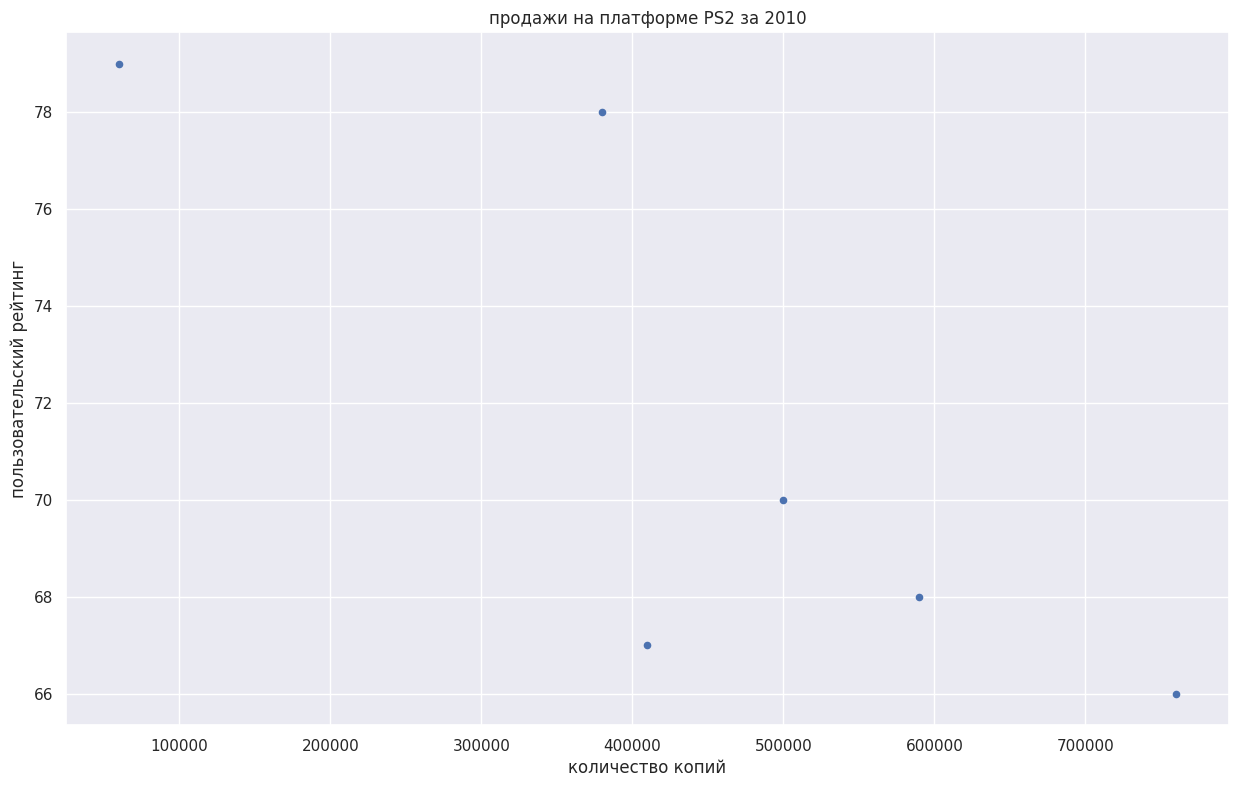

In [58]:
games.query('platform == "PS2" and year_of_release == 2010').plot.scatter (x = 'sum', y = 'user_score')
plt.title('продажи на платформе PS2 за 2010')
plt.xlabel('количество копий')
plt.ylabel('пользовательский рейтинг')

* интересная тендеция под закат платформы кориляция пользователей становится отрицательная

#### cоотнесём выводы с продажами игр на других платформах

In [59]:
_groop_p = games.groupby(['platform'])['sum'].count()
display(_groop_p.index[1]) # Пройдемся по этому списку платформ
_groop_p_con = pd.DataFrame() # сюда запишем резулбтаты

'3DO'

* снизу пройдемся по всем платформам и посмотрим корреляцию пользователей и критиков

In [60]:
_groop_p_con = pd.DataFrame()
for i in range(0, len(_groop_p)):
    _corr_c = games.query('platform == @_groop_p.index[@i]')['sum'].corr(games.query('platform == @_groop_p.index[@i]')['critic_score'].astype('float64'))
    _corr_u = games.query('platform == @_groop_p.index[@i]')['sum'].corr(games.query('platform == @_groop_p.index[@i]')['user_score'].astype('float64'))
    _groop_p_con = pd.concat([_groop_p_con, pd.DataFrame({'platform': [_groop_p.index[i]], 'corr_c': [_corr_c], 'corr_u': [_corr_u]})])
_groop_p_con = _groop_p_con.query('corr_c == corr_c').sort_values(by='corr_c')

In [61]:
_groop_p_con

,platform,corr_c,corr_u
0,PSV,0.131517,0.013580
0,Wii,0.177560,0.112414
0,DS,0.236379,0.130436
0,GBA,0.239101,0.100758
0,PC,0.256887,0.010476
0,PSP,0.316775,0.219264
0,GC,0.325920,0.234656
0,WiiU,0.348380,0.400219
0,3DS,0.349401,0.224808
0,DC,0.350127,-0.303399


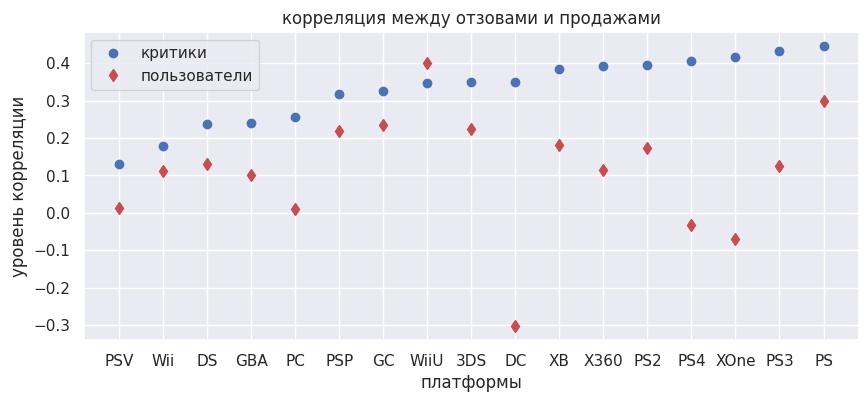

In [62]:
_con_c_u = _groop_p_con.set_index('platform')
# рисуем графики
sns.set(style="darkgrid")
plt.figure(figsize=(10, 4))
plt.plot(_con_c_u['corr_c'], 'bo', label='критики')
plt.plot(_con_c_u['corr_u'], 'rd', label='пользователи')
plt.title('корреляция между отзовами и продажами')
plt.xlabel('платформы')
plt.ylabel('уровень корреляции')
plt.legend()
plt.show()

* вывод можно сделать что пользователи больше доверяет рейтингу критиков и охотнее покупают игры
* если рейтинг критиков более менее стабильный по всем платформам то пользовательский рейтинг непредсказуемо влияет на продажу причем по разным платформам очень сильно отличается

<ipython-input-63-309e9bb99e67>:2: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  _platform_c = games.query('platform==@i and critic_score > 0 and year_of_release == 2016')
<ipython-input-63-309e9bb99e67>:3: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  _platform_u = games.query('platform==@i and user_score > 0 and year_of_release == 2016')


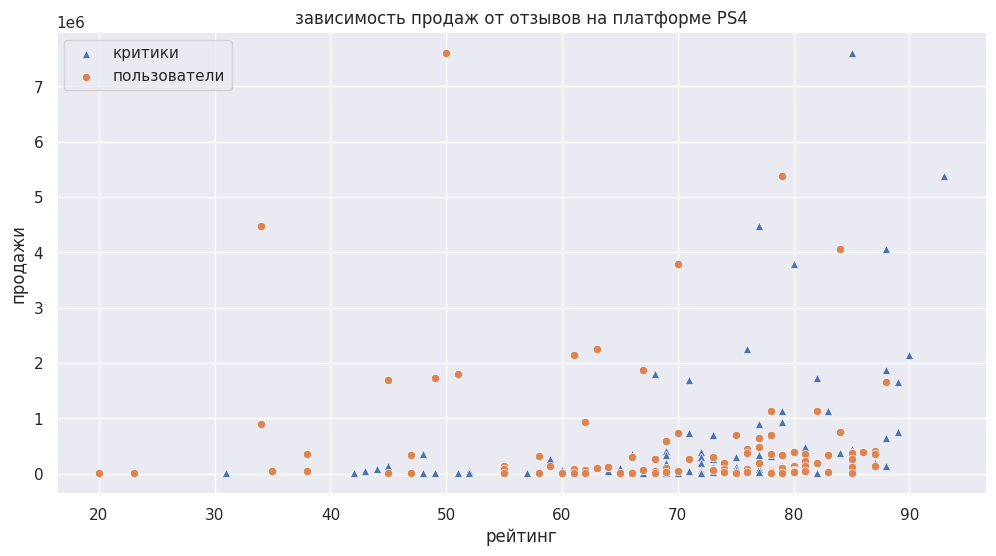

'Корреляция продаж к рйтингу критиков: 0.37550440908635085'

'Корреляция продаж к рйтингу пользователей: -0.12246112419649195'

<ipython-input-63-309e9bb99e67>:2: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  _platform_c = games.query('platform==@i and critic_score > 0 and year_of_release == 2016')
<ipython-input-63-309e9bb99e67>:3: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  _platform_u = games.query('platform==@i and user_score > 0 and year_of_release == 2016')


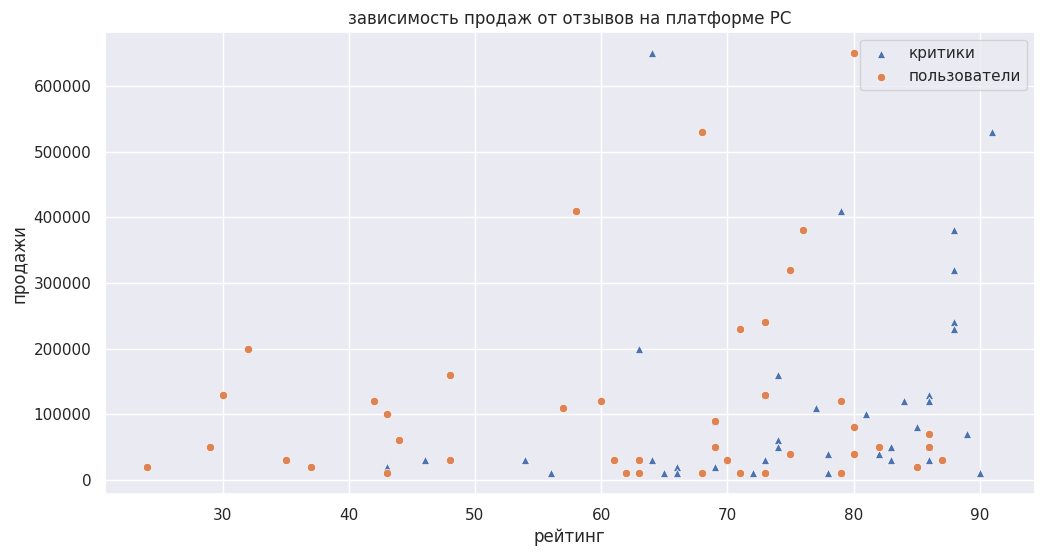

'Корреляция продаж к рйтингу критиков: 0.25415185662368345'

'Корреляция продаж к рйтингу пользователей: 0.11618254888243368'

<ipython-input-63-309e9bb99e67>:2: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  _platform_c = games.query('platform==@i and critic_score > 0 and year_of_release == 2016')
<ipython-input-63-309e9bb99e67>:3: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  _platform_u = games.query('platform==@i and user_score > 0 and year_of_release == 2016')


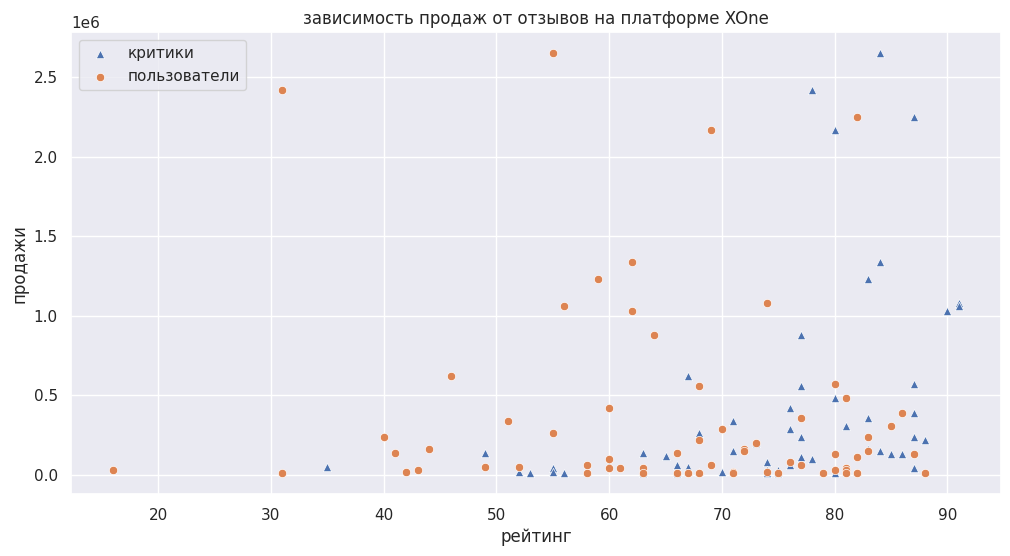

'Корреляция продаж к рйтингу критиков: 0.4071246847170809'

'Корреляция продаж к рйтингу пользователей: -0.1303029918882337'

In [63]:
for i in ['PS4','PC','XOne']:
    _platform_c = games.query('platform==@i and critic_score > 0 and year_of_release == 2016')
    _platform_u = games.query('platform==@i and user_score > 0 and year_of_release == 2016')
    plt.subplots(figsize=(12, 6), )
    sns.scatterplot( data=_platform_c, x='critic_score', y='sum', marker='^',label='критики')
    sns.scatterplot( data=_platform_u, x='user_score', y='sum', marker='o',label='пользователи')
    plt.title(f'зависимость продаж от отзывов на платформе {i}')
    plt.xlabel('рейтинг')
    plt.ylabel('продажи')
    plt.show()
    display(f'Корреляция продаж к рйтингу критиков: {_platform_u["sum"].corr(_platform_u["critic_score"].astype("float"))}')
    display(f'Корреляция продаж к рйтингу пользователей: {_platform_u["sum"].corr(_platform_u["user_score"].astype("float"))}')



* корреляция критиков высокая, я предполагаю, что сперва пользователи смотрят на рейтинг критиков, а потом покупают игры
* а после того, как они поиграют помучаются с играми оставляет много негативных отзывов тем самым корреляция пользователей становится даже отрицательной



### Посмотрим на общее распределение игр по жанрам.

In [64]:
_sum_cont =  games.groupby('genre').agg({'sum':['sum','count']}).sort_values(by=[('sum',   'sum')])
# Среднее количество продаж одной игры
_sum_cont['sum_cont'] = _sum_cont[('sum',   'sum')]/_sum_cont[('sum',   'count')]
_sum_cont['sum_cont']= _sum_cont['sum_cont'].astype('int64')
_sum_cont.reset_index(inplace=True)
_sum_cont.columns=['genre','sum','count','one_sum']
_sum_cont = _sum_cont.sort_values(by='sum',ascending=False)
_sum_cont.reset_index(inplace=True,drop=True)
display(_sum_cont.sort_values(by='one_sum'))

,genre,sum,count,one_sum
10,Adventure,237590000,1303,182340
11,Strategy,174230000,683,255095
9,Puzzle,242569999,580,418224
8,Simulation,389969998,873,446701
5,Misc,802509998,1750,458577
0,Action,1744169991,3369,517711
7,Fighting,447529997,849,527126
1,Sports,1331259992,2347,567217
6,Racing,728669996,1249,583402
3,Role-Playing,934559997,1498,623871


* количество проданных игр, количество игр, сколько копий одной игры было куплено (в среднем).
* вывод можно заделать такой что луче всего делать игры в жанре Platform их больше всего покупают почти миллион проданных копий на одну игру, меньше всего в жанре Adventure их покупают в 5ть раз меньше.


In [65]:
display(_sum_cont.sort_values(by='sum'))

,genre,sum,count,one_sum
11,Strategy,174230000,683,255095
10,Adventure,237590000,1303,182340
9,Puzzle,242569999,580,418224
8,Simulation,389969998,873,446701
7,Fighting,447529997,849,527126
6,Racing,728669996,1249,583402
5,Misc,802509998,1750,458577
4,Platform,827769998,888,932173
3,Role-Playing,934559997,1498,623871
2,Shooter,1052449995,1323,795502


* больше всего конечно покупают игор в жанре Action а вот Strategy берут в 10 раз меньше

''

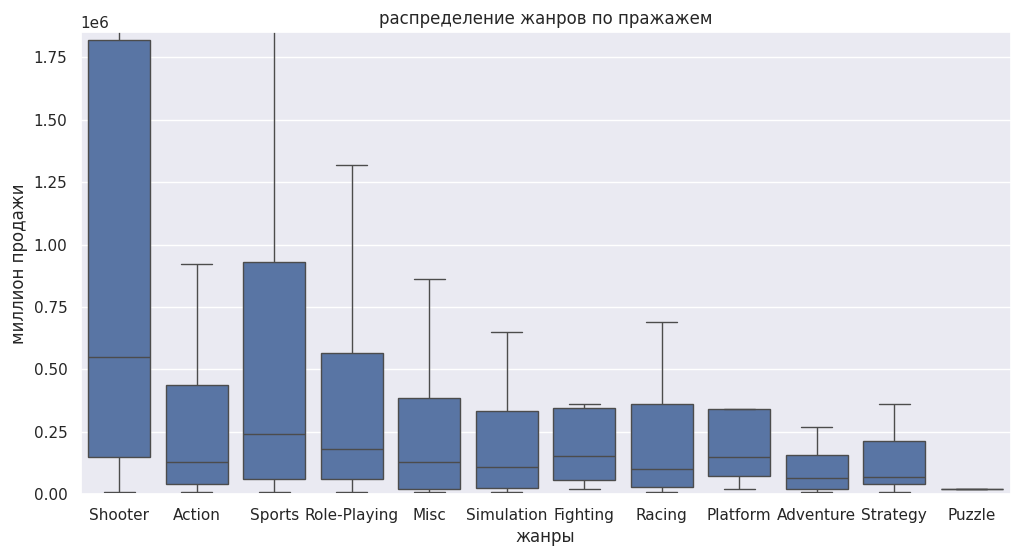

In [66]:
_p_3 = ['PS4','PC','XOne']
_games_3_platforms = games.query('platform in @_p_3 and year_of_release >=2014')
sns.set(rc={'figure.figsize':(12,6)})
sns.boxplot(data=_games_3_platforms, x="genre", y="sum", dodge=False, showfliers=False).\
set(ylim=(0,1850000), title='распределение жанров по пражажем', xlabel='жанры', ylabel='миллион продажи')
;

* теперь картина по продажам изменилась теперь на 1 месте у нас шутеры потом спортивные игры потом ролевые и игры в жанре экшен только на 4 можно поставить наравне с музыкой и гонками


## Составим портрет пользователя каждого региона.

### самые популярные платформы (топ-5)

In [67]:
games.query('year_of_release > = 2014').groupby('platform')['sum'].median().sort_values(ascending=False).head(5)

,sum
platform,
XOne,205000.0
WiiU,190000.0
PS4,185000.0
Wii,180000.0
X360,180000.0


In [68]:
_platform_sum_median = pd.DataFrame()
for i in games['platform'].unique():
    _platform_sum_median = pd.\
    concat([_platform_sum_median, pd.DataFrame({'platform': [i],\
    'median': [games.query('platform == @i and year_of_release > = 2014')['sum'].median()]})])
_top5_p = list(_platform_sum_median.sort_values(by='median',ascending=False)['platform'].head(5))
_platform_sum_median = _platform_sum_median.dropna()
display(_platform_sum_median)
_top5_p

,platform,median
0,Wii,180000.0
0,X360,180000.0
0,PS3,110000.0
0,PS4,185000.0
0,3DS,90000.0
0,PC,60000.0
0,PSP,20000.0
0,XOne,205000.0
0,WiiU,190000.0
0,PSV,40000.0


['XOne', 'WiiU', 'PS4', 'Wii', 'X360']

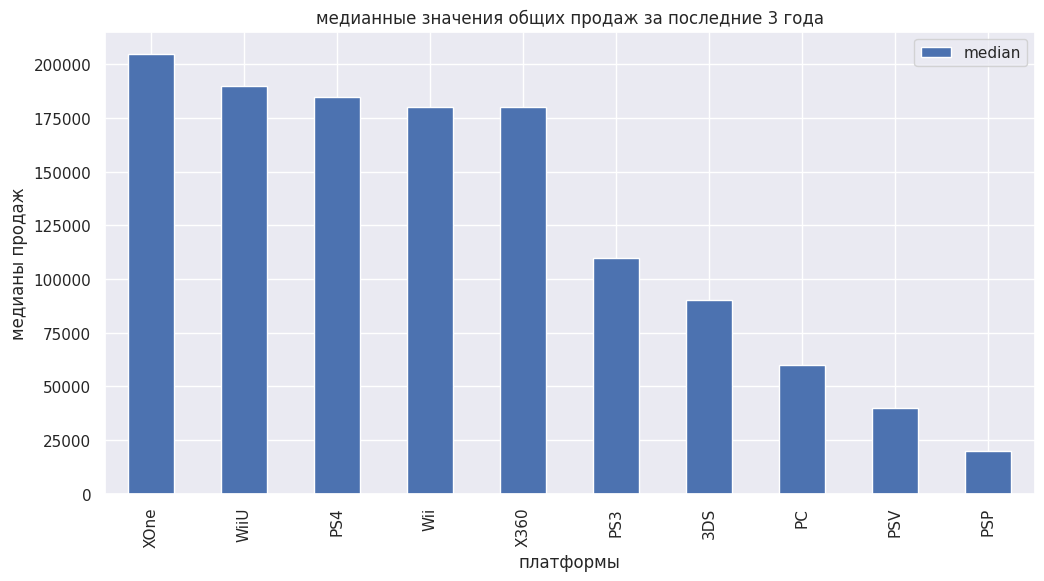

"Топ-5 платформ : ['XOne', 'WiiU', 'PS4', 'Wii', 'X360']"

In [69]:
ax = _platform_sum_median.query('median > 0').sort_values(by='median',ascending=False).plot.bar(x='platform')
plt.title('медианные значения общих продаж за последние 3 года')
plt.xlabel('платформы')
plt.ylabel('медианы продаж')
plt.show()
display(f'Топ-5 платформ : {_top5_p}')


* самые популярные платформы (топ-5) за 2014 по 2016 включительно

In [70]:
_df = games.query('(platform in @_top5_p) and (year_of_release > = 2014)').groupby('platform').agg({'na_sales':['sum'],'eu_sales':['sum'],'jp_sales':['sum'],'sum':['sum'],'other_sales':['sum']})
_df.reset_index(inplace= True)
_df.columns = ['platform','na','eu','jp','sum','other']
_df.reset_index(inplace=True,drop=True)
_df

,platform,na,eu,jp,sum,other
0,PS4,98609999,130039998,15020000,288149997,44480000
1,Wii,2080000,2590000,0,5070000,400000
2,WiiU,19360000,13150000,7310000,42980000,3160000
3,X360,28300000,15490000,80000,48220000,4350000
4,XOne,81270000,46249999,320000,140359999,12520000


* получилии таблицу 5 самых популярных платформ и продажи в отдельных регионах


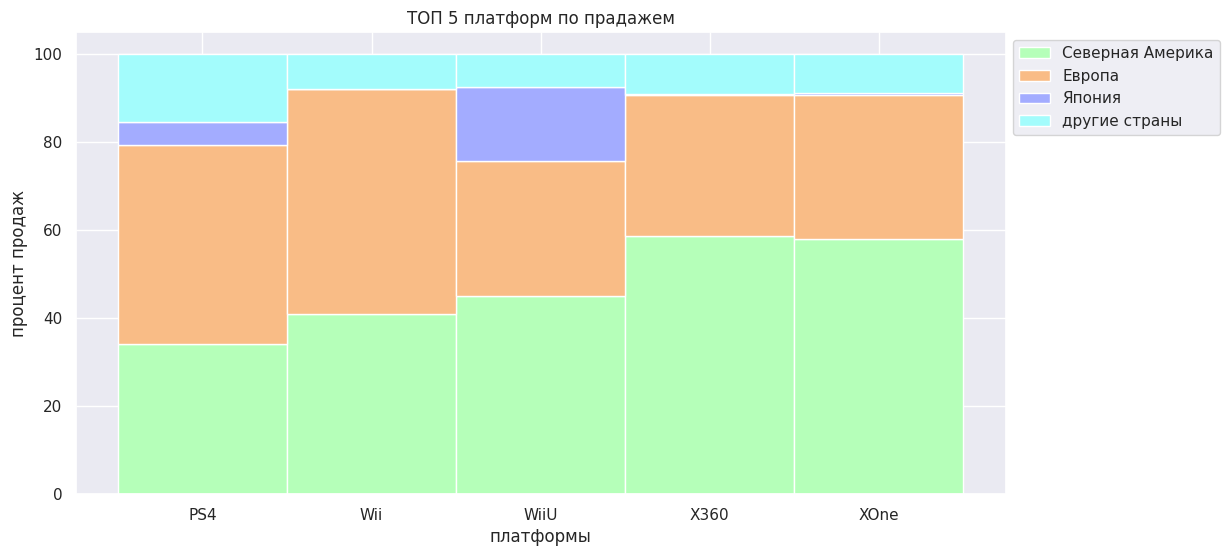

In [71]:
r = list(range(0,5))
raw_data = {'greenBars': _df['na'].values, \
            'orangeBars': _df['eu'].values, \
            'blueBars': _df['jp'].values, \
            'redBars': _df['other'].values}
df = pd.DataFrame(raw_data)

# From raw value to percentage
totals = [i+j+k+z for i,j,k,z in zip(df['greenBars'], df['orangeBars'], df['blueBars'], df['redBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
redBars = [i / j * 100 for i,j in zip(df['redBars'], totals)]
# plot
barWidth = 1
names =_df['platform'].head(5).values
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth, label="Северная Америка")
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label="Европа")
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth, label="Япония")
 # Create blue Bars
plt.bar(r, redBars, bottom=[i+j+z for i,j,z in zip(blueBars, greenBars, orangeBars)], color='#a3fcfc', edgecolor='white', width=barWidth, label="другие страны")
#Custom x axis
plt.title(f'ТОП 5 платформ по прадажем')
plt.xticks(r, names)
plt.xlabel("платформы")
plt.ylabel("процент продаж")
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
# Show graphic
plt.show()

<div class="alert alert-info"> <b>
Топ-5 платформ выбрал за последнии 3 года по медианне общих продаж
    
- в каждом столбике все продажи игр конкретной платформы за 3 года
- цвета определяют доли продаж в разных регионах
</div>


* для японии стоит поставлять игры только для двух платформ WiiU и PS4



### самые популярные жанры (топ-5)

In [72]:
_genre_sum_median = pd.DataFrame()
for i in games['genre'].unique():
    _genre_sum_median = pd.\
    concat([_genre_sum_median, pd.DataFrame({'genre': [i],\
    'median': [games.query('genre == @i and year_of_release > = 2014')['sum'].median()]})])
_top5_genre = list(_genre_sum_median.sort_values(by='median',ascending=False)['genre'].head(5))

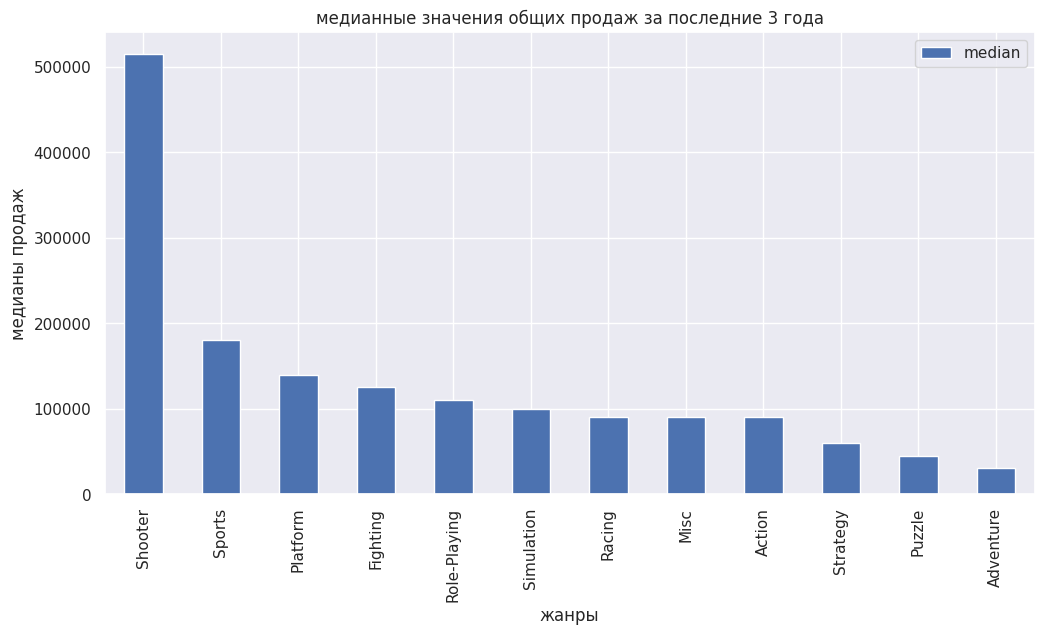

"Топ-5 жанров : ['Shooter', 'Sports', 'Platform', 'Fighting', 'Role-Playing']"

In [73]:
ax = _genre_sum_median.query('median > 0').sort_values(by='median',ascending=False).plot.bar(x='genre')
plt.title('медианные значения общих продаж за последние 3 года')
plt.xlabel('жанры')
plt.ylabel('медианы продаж')
plt.show()
display(f'Топ-5 жанров : {_top5_genre}')

* самые популярные жанры (топ-5) за 20014 по 2016 включительно

In [74]:
_df_genre= games.query('genre in @_top5_genre and year_of_release > = 2014').groupby('genre').agg({'na_sales':['sum'],'eu_sales':['sum'],'jp_sales':['sum'],'other_sales':['sum'],'sum':['sum']})
_df_genre.reset_index(inplace= True)
_df_genre.columns = ['genre','_na','_eu','_jp','_other','sum']
_df_genre = _df_genre.sort_values(by='sum',ascending=False).head(5)
_df_genre

,genre,_na,_eu,_jp,_other,sum
3,Shooter,79020000,65519999,4870000,21530000,170939999
4,Sports,46130000,45729999,3260000,14360000,109479999
2,Role-Playing,33580000,28220000,31230000,8670000,101700000
0,Fighting,12430000,6690000,6370000,2730000,28220000
1,Platform,6790000,6800000,2690000,1810000,18090000


* сгруппировали все жанры и посчитали сумму продаж в каждом регионе и все это сохранили в таблице `_df_genre`

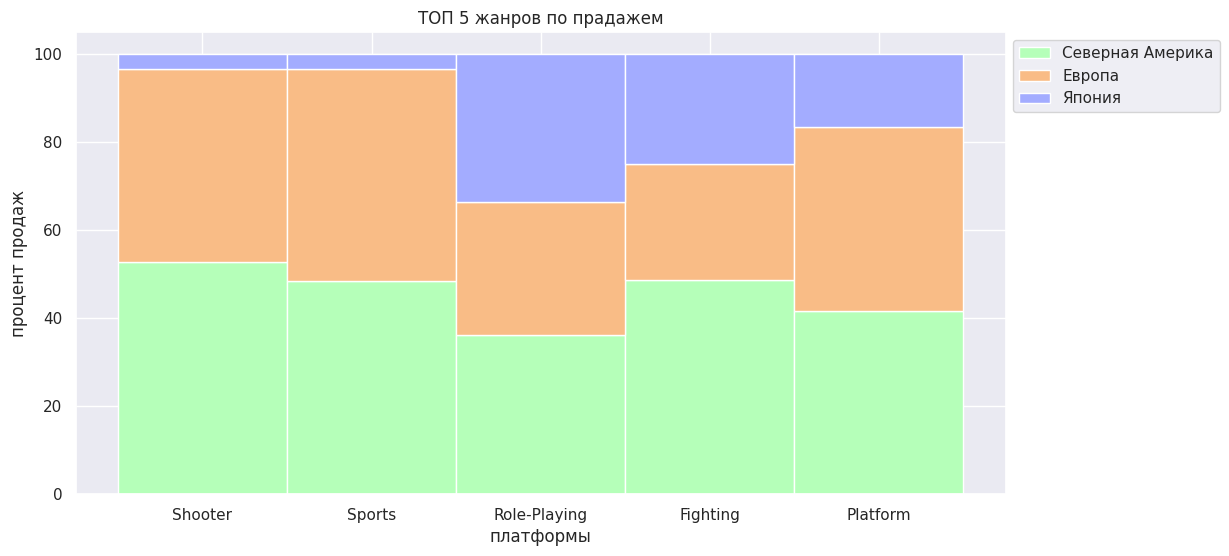

In [75]:
r = list(range(0,5))
raw_data = {'greenBars': _df_genre['_na'].head(5).values, \
            'orangeBars': _df_genre['_eu'].head(5).values, \
            'blueBars': _df_genre['_jp'].head(5).values}
df = pd.DataFrame(raw_data)

# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
#['_na','_eu','_jp']
# plot
barWidth = 1
names =list(_df_genre['genre'].head(5).values)
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth, label="Северная Америка")
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label="Европа")
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth, label="Япония")

#Custom x axis
plt.title(f'ТОП 5 жанров по прадажем')
plt.xticks(r, names)
plt.xlabel("платформы")
plt.ylabel("процент продаж")
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

# Show graphic
plt.show()

<div class="alert alert-info"> <b>
Топ-5 жанров выбрал за последнии 3 года по медианне общих продаж
    
- в каждом столбике все продажи игр по конкретному жанру за три года
- цвета определяют доли продаж в разных регионах
</div>


* везде продажи по жанрам вроде одинаковые бросаются в глаза только Япония очень они любят ролевые игры, а вот шуторы и спортивные не очень.

### влияние рейтинга ESRB на продажи в отдельном регионе

* проведём анализ по ТОП-5 жанрам которые рассматривали выше

In [76]:
_df_rating = games.query('genre in @_top5_genre').groupby(['genre','rating']).agg({'na_sales':['sum'],'eu_sales':['sum'],'jp_sales':['sum'],'other_sales':['sum'],'sum':['sum']})
_df_rating.reset_index(inplace= True)
_df_rating.columns = ['genre','rating','_na','_eu','_jp','_other','_sum']
display(_df_rating.sort_values(by='_sum',ascending=False).head(5))
display(_df_rating.shape)

,genre,rating,_na,_eu,_jp,_other,_sum
16,Sports,E,460049996,251609998,35890000,97830000,845379994
14,Shooter,M,341169999,205240000,12220000,67780000,626409999
4,Platform,E,171319999,93430000,40090000,24870000,329709999
11,Role-Playing,T,93809999,52709999,73640000,19300000,239459998
3,Fighting,T,120689999,55600000,26790000,23400000,226479999


(20, 7)

* сгруппировали все (жанры рейтинг) и посчитали сумму продаж в каждом регионе и все это сохранили в таблице `_df_rating`

In [77]:
_df_genre= _df_rating.groupby('genre').agg({'_na':['sum'],'_eu':['sum'],'_jp':['sum'],'_other':['sum']})
_df_genre.reset_index(inplace= True)
_df_genre.columns = ['genre','na','eu','jp','other']
_df_genre


,genre,na,eu,jp,other
0,Fighting,142489999,63410000,28340000,26750000
1,Platform,217269999,119710000,43320000,35310000
2,Role-Playing,224599999,121999999,126300000,41600000
3,Shooter,468469999,272599999,19150000,91590000
4,Sports,556069996,291009998,37580000,113170000


* теперь из получившейся таблицы `_df_rating` сгруппировали только по жарнам и получили суммы продаж во всех регионах и сохранили в таблице `_df_genre` получилось 11 жанров

In [78]:
_df_genre_sum =  _df_rating.merge(_df_genre, on='genre',how='left' )
display(_df_genre_sum.head(6))

,genre,rating,_na,_eu,_jp,_other,_sum,na,eu,jp,other
0,Fighting,E,660000,300000,80000,20000,1060000,142489999,63410000,28340000,26750000
1,Fighting,E10+,2890000,690000,620000,390000,4590000,142489999,63410000,28340000,26750000
2,Fighting,M,18250000,6820000,850000,2940000,28860000,142489999,63410000,28340000,26750000
3,Fighting,T,120689999,55600000,26790000,23400000,226479999,142489999,63410000,28340000,26750000
4,Platform,E,171319999,93430000,40090000,24870000,329709999,217269999,119710000,43320000,35310000
5,Platform,E10+,31240000,18780000,2400000,8200000,60620000,217269999,119710000,43320000,35310000


* теперь объединили 2 таблицы `_df_rating` и `_df_genre` чтобы у нас в одной строке были **суммы продаж по регионам, объединенных по жанру и рейтингу** и в одной же строке была **сумма по жанру без учета рейтинга** и сохранили в таблице `_df_genre_sum`

In [79]:
_df_genre_sum_prc = _df_genre_sum
_df_genre_sum_prc['_na_'] = (_df_genre_sum_prc['_na'] / _df_genre_sum_prc['na'])
_df_genre_sum_prc['_eu_'] = (_df_genre_sum_prc['_eu'] / _df_genre_sum_prc['eu'])
_df_genre_sum_prc['_jp_'] = (_df_genre_sum_prc['_jp'] / _df_genre_sum_prc['jp'])
_df_genre_sum_prc['_other_'] = (_df_genre_sum_prc['_other'] / _df_genre_sum_prc['other'])
display(_df_genre_sum_prc.head(8))
_df_genre_sum_prc.query('genre == "Sports"')

,genre,rating,_na,_eu,_jp,_other,_sum,na,eu,jp,other,_na_,_eu_,_jp_,_other_
0,Fighting,E,660000,300000,80000,20000,1060000,142489999,63410000,28340000,26750000,0.004632,0.004731,0.002823,0.000748
1,Fighting,E10+,2890000,690000,620000,390000,4590000,142489999,63410000,28340000,26750000,0.020282,0.010882,0.021877,0.014579
2,Fighting,M,18250000,6820000,850000,2940000,28860000,142489999,63410000,28340000,26750000,0.128079,0.107554,0.029993,0.109907
3,Fighting,T,120689999,55600000,26790000,23400000,226479999,142489999,63410000,28340000,26750000,0.847007,0.876833,0.945307,0.874766
4,Platform,E,171319999,93430000,40090000,24870000,329709999,217269999,119710000,43320000,35310000,0.788512,0.780469,0.925439,0.704333
5,Platform,E10+,31240000,18780000,2400000,8200000,60620000,217269999,119710000,43320000,35310000,0.143784,0.156879,0.055402,0.232229
6,Platform,M,600000,570000,240000,180000,1590000,217269999,119710000,43320000,35310000,0.002762,0.004762,0.005540,0.005098
7,Platform,T,14110000,6930000,590000,2060000,23690000,217269999,119710000,43320000,35310000,0.064942,0.057890,0.013620,0.058340


,genre,rating,_na,_eu,_jp,_other,_sum,na,eu,jp,other,_na_,_eu_,_jp_,_other_
16,Sports,E,460049996,251609998,35890000,97830000,845379994,556069996,291009998,37580000,113170000,0.827324,0.864609,0.955029,0.864452
17,Sports,E10+,33940000,12430000,1230000,6130000,53730000,556069996,291009998,37580000,113170000,0.061035,0.042713,0.032730,0.054166
18,Sports,M,2770000,630000,200000,310000,3910000,556069996,291009998,37580000,113170000,0.004981,0.002165,0.005322,0.002739
19,Sports,T,59310000,26340000,260000,8900000,94810000,556069996,291009998,37580000,113170000,0.106659,0.090512,0.006919,0.078643


* `_na_`,`_eu_`,`_jp_`,`_other_`- доли продаж по жанрам в отдельных регионах, если мы сгрупируем эти столбики по жанру то сумма в них получатся по единицы
* проверим это:

In [80]:
_df_genre_sum_prc.groupby('genre').agg({'_na_':'sum','_eu_':'sum','_jp_':'sum','_other_':'sum'})

,_na_,_eu_,_jp_,_other_
genre,,,,
Fighting,1.0,1.0,1.0,1.0
Platform,1.0,1.0,1.0,1.0
Role-Playing,1.0,1.0,1.0,1.0
Shooter,1.0,1.0,1.0,1.0
Sports,1.0,1.0,1.0,1.0


* все верно теперь у нас есть доли по каждому рейтингу в таблице `_df_genre_sum_prc`
* построим график топ 5 по жанрам

In [81]:
_top5_genre

['Shooter', 'Sports', 'Platform', 'Fighting', 'Role-Playing']

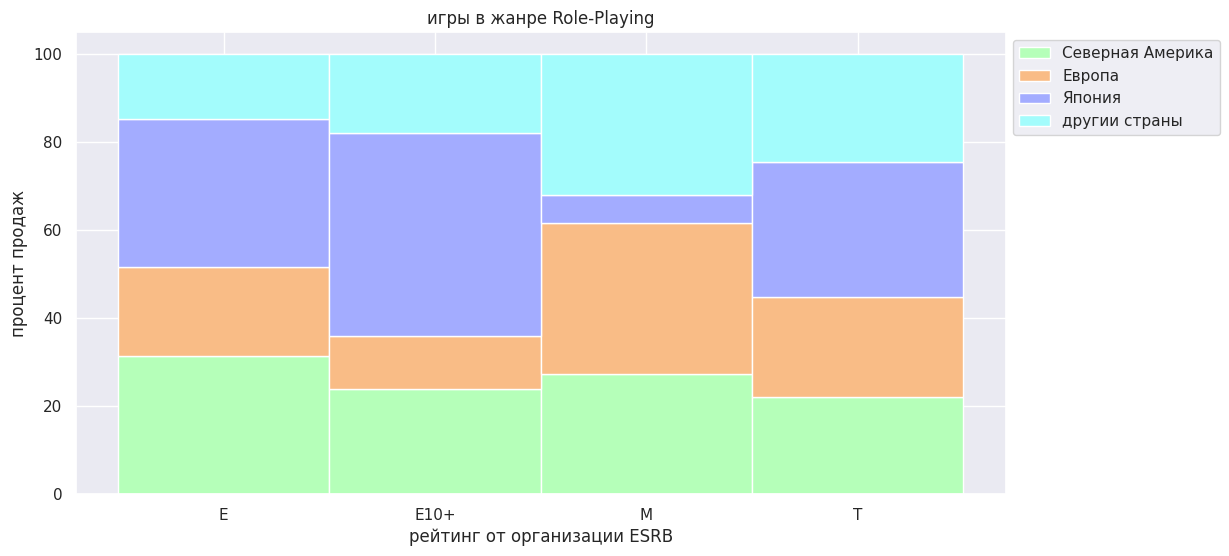

In [82]:
for i in range(4, 5):
    _genre = _top5_genre[i]

  # Data

    r = list(range(0,len(_df_genre_sum_prc.query('genre == @_genre').index)))
    raw_data = {'greenBars': _df_genre_sum_prc.query('genre == @_genre')['_na_'].values, \
              'orangeBars': _df_genre_sum_prc.query('genre == @_genre')['_eu_'].values, \
              'blueBars': _df_genre_sum_prc.query('genre == @_genre')['_jp_'].values, \
              'redBars': _df_genre_sum_prc.query('genre == @_genre')['_other_'].values}
    df = pd.DataFrame(raw_data)

  # From raw value to percentage
    totals = [i+j+k+z for i,j,k,z in zip(df['greenBars'], df['orangeBars'], df['blueBars'], df['redBars'])]

    greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
    orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
    blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
    redBars = [i / j * 100 for i,j in zip(df['redBars'], totals)]
  # plot
    barWidth = 1
    names =_df_genre_sum_prc.query('genre == @_genre')['rating'].values
  # Create green Bars
    plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth, label="Северная Америка")
  # Create orange Bars
    plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label="Европа")
  # Create blue Bars
    plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth, label="Япония")
   # Create blue Bars
    plt.bar(r, redBars, bottom=[i+j+z for i,j,z in zip(blueBars, greenBars, orangeBars)], color='#a3fcfc', edgecolor='white', width=barWidth, label="другии страны")
# Custom x axis
    plt.title(f'игры в жанре {_genre}')
    plt.xticks(r, names)
    plt.xlabel("рейтинг от организации ESRB")
    plt.ylabel("процент продаж")
  # Add a legend
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
    # Show graphic
    plt.show()



<div class="alert alert-info">
    
* здесь представлены доли продаж топ-5 платформ за 2014 по 2016 год.  
* если сумировать все доли синего цвета во всех столбиках то это все продажи в Японии жанра *Role-Playing*
    
* тоже касается и других цветов
</div>

* видно что в Японии *Role-Playing* больше всего данный жанр покупают игроки с рейтингом *E10+*, в Европе и в (других странах) игроки с рейтингом *M*, в Северной Америке продажи распределены по даннаму жанру примерно одинаково.

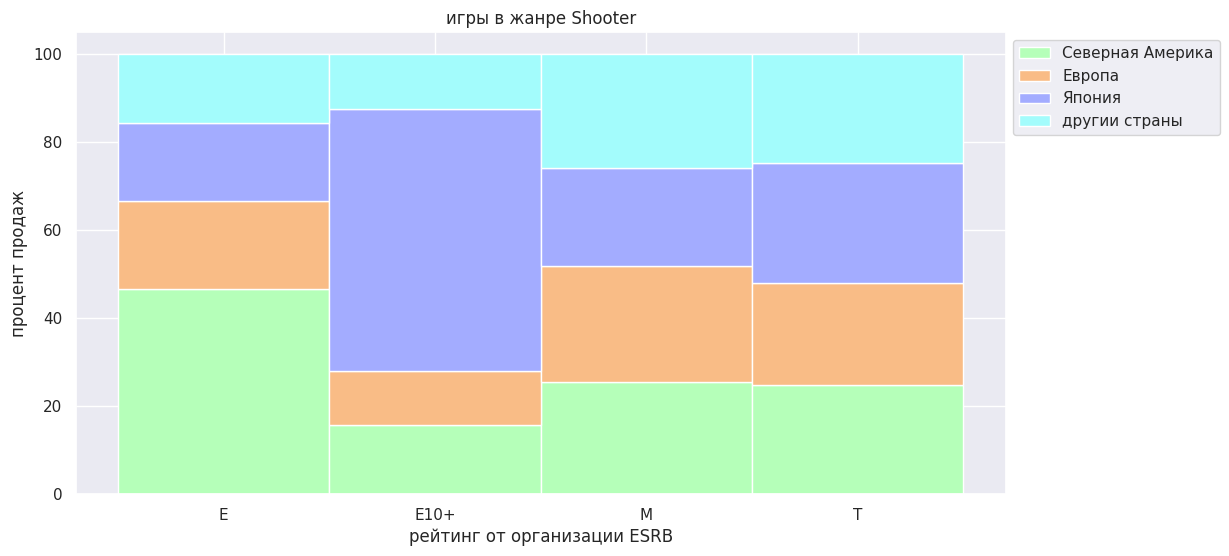

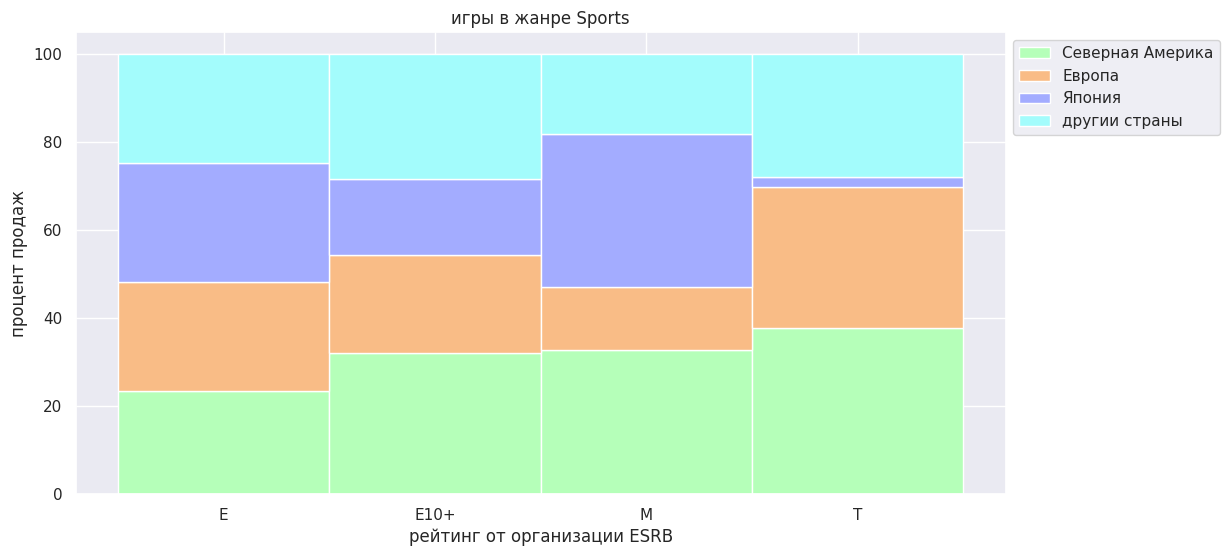

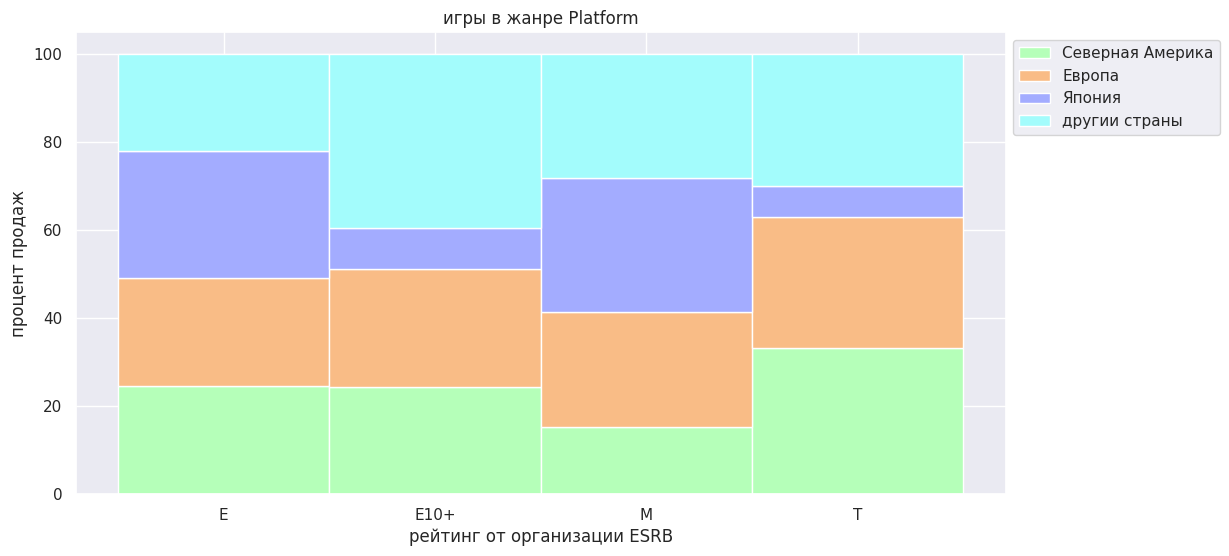

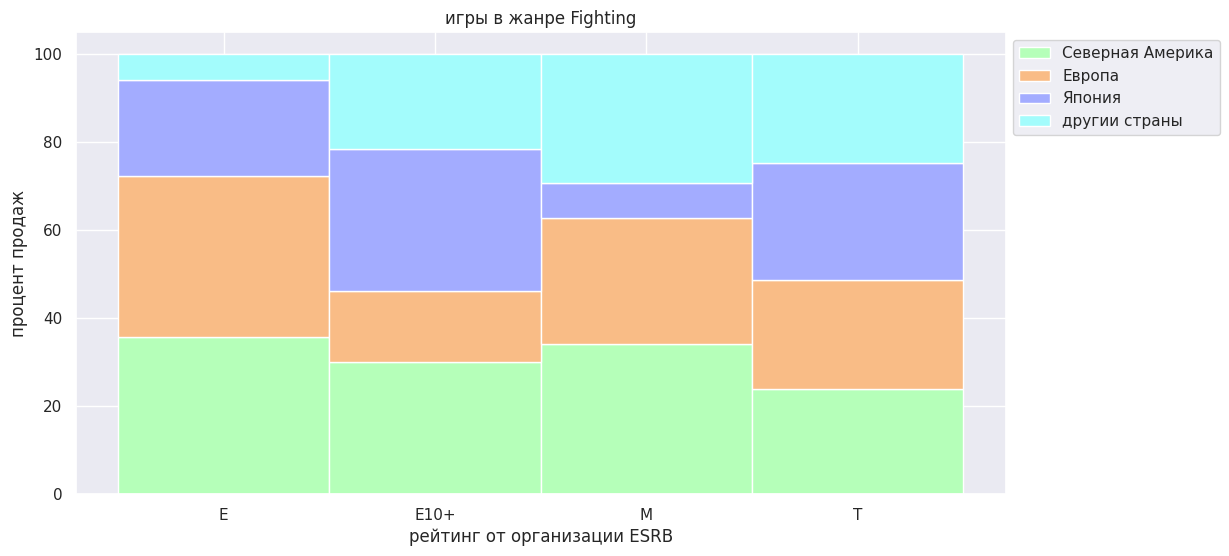

In [83]:
for i in range(0, 4):
    _genre = _top5_genre[i]

  # Data

    r = list(range(0,len(_df_genre_sum_prc.query('genre == @_genre').index)))
    raw_data = {'greenBars': _df_genre_sum_prc.query('genre == @_genre')['_na_'].values, \
              'orangeBars': _df_genre_sum_prc.query('genre == @_genre')['_eu_'].values, \
              'blueBars': _df_genre_sum_prc.query('genre == @_genre')['_jp_'].values, \
              'redBars': _df_genre_sum_prc.query('genre == @_genre')['_other_'].values}
    df = pd.DataFrame(raw_data)

  # From raw value to percentage
    totals = [i+j+k+z for i,j,k,z in zip(df['greenBars'], df['orangeBars'], df['blueBars'], df['redBars'])]

    greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
    orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
    blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
    redBars = [i / j * 100 for i,j in zip(df['redBars'], totals)]
  # plot
    barWidth = 1
    names =_df_genre_sum_prc.query('genre == @_genre')['rating'].values
  # Create green Bars
    plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth, label="Северная Америка")
  # Create orange Bars
    plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label="Европа")
  # Create blue Bars
    plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth, label="Япония")
   # Create blue Bars
    plt.bar(r, redBars, bottom=[i+j+z for i,j,z in zip(blueBars, greenBars, orangeBars)], color='#a3fcfc', edgecolor='white', width=barWidth, label="другии страны")
# Custom x axis
    plt.title(f'игры в жанре {_genre}')
    plt.xticks(r, names)
    plt.xlabel("рейтинг от организации ESRB")
    plt.ylabel("процент продаж")
  # Add a legend
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
    # Show graphic
    plt.show()

<div class="alert alert-info"> <b>
Похоже я перестарался посмотрел влияния возрастного рейтинга на все пять популярные жанры.
    
* но так более подробно можно составить портрет пользователя для каждого региона!
    
* очень интересно обстоит дело с самым популярным жанром Shooter доля возроста E10+ в Японии самая высокая а во всех остальных регионах в этом возрасте самые низкие доли продаж. Рынок в японском регионе очень отличный от других.  
</div>


## Проверим гипотезы.

### средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- **составим три нулевые гипотезы**
* 1 нулевая гипотеза H0 -пользовательский рейтинг платформ Xbox и One одинаковый.
* 2 нулевая гипотеза H0 - пользовательский рейтинг платформ Xbox и PC одинаковый
* 3  нулевая гипотеза H0 - пользовательский рейтинг платформ One и PC одинаковый
-- ***если хоть одна H0 гипотеза будет отвергнута то гипотезу что  средние пользовательские рейтинги платформ Xbox One и PC одинаковые отвергаем***


<div class="alert alert-info">
    
* 1 нулевая гипотеза H0 -пользовательский рейтинг платформ XOne и PC одинаковый.
    
* альтернативная гипотеза H1 -пользовательский рейтинг платформ XOne и PC разный.
</div>

In [84]:
_list_XOne = games.query('year_of_release >= 2014').query('platform == "XOne"')['user_score'].dropna()
_list_PC = games.query('year_of_release >= 2014').query('platform == "PC"')['user_score'].dropna()
display(_list_XOne.head(5))
_list_PC.head(5)

,user_score
165,79
179,54
242,64
270,62
373,41


,user_score
458,39
1530,54
1730,79
2303,57
2784,59


In [85]:
_list_XOne = _list_XOne.astype('float')
_list_PC = _list_PC.astype('float')

* пришлось поменять форматы статистические функции не работали ?

In [86]:
results = st.ttest_ind(
    _list_XOne,
    _list_PC,
    equal_var=False)

alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668918
Не получилось отвергнуть нулевую гипотезу


* гипотеза верна!

### средние пользовательские рейтинги жанров Action и Sports разные

* нуливая гипотеза H0 -пользовательский рейтинг жанров Action и Sport одинаковый.
* альтернативная гипотеза H1 -пользовательский рейтинг жанров Action и Sport разный.

In [87]:
_list_Action = games.query('year_of_release >= 2014').query('genre == "Action"')['user_score'].dropna()
_list_Sports = games.query('year_of_release >= 2014').query('genre == "Sports"')['user_score'].dropna()
display(_list_Action.head(5))
_list_Sports.head(5)

,user_score
42,83
165,79
231,81
295,63
304,49


,user_score
77,43
94,50
143,57
264,45
314,67


In [88]:
_list_Action = _list_Action.astype('float')
_list_Sports = _list_Sports.astype('float')

* пришлось поменять форматы статистические функции не работали ?

In [89]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу
results = st.ttest_ind(_list_Action, _list_Sports)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
  print('H0 - нуливую гипотезу отвергаем: что пользовательский рейтинг жанров Action и Sport yt одинаковый')
else:
  print('H0 - нуливую гипотезу принимаем: -пользовательский рейтинг жанров Action и Sport одинаковый')

p-значение: 2.871114798510669e-19
H0 - нуливую гипотезу отвергаем: что пользовательский рейтинг жанров Action и Sport yt одинаковый


* гипотеза не  верна!

## Вывод

</div>* **Представленная таблицы содержала   информацию о 16714 продаж игр в разных регионах Мира (Северная Америка, Европа, Япония и «другие страны»), кроме информации о количестве проданных копий имелась  информация о годе выпуска игры их жанрах, платформах и рейтингах. Всего одна таблица за 1980 по 2016 год.**
- данные содержали пустые значения. Было всего 2 дубликата одна и та же игра в том же году на одной и той же платформе.
    

* **Для проведения анализа была проведена предобработка данных:**


- в именах столбцов все буквы перевели в нижний регистр


- приведен столбец `year_of_release` к типу Int64, года могут быть только целыми


- приведен столбец `year_of_release` к типу Int64, года могут быть только целыми


- приведен столбец `year_of_release` к типу Int64, года могут быть только целыми


- приведен столбец `na_sales` к типу Int64 количество продаж могут быть только целыми


- приведен столбец `eu_sales` к типу Int64 количество продаж могут быть только целыми


- приведен столбец `jp_sales` к типу Int64 количество продаж могут быть только целыми


- приведен столбец `other_sales` к типу Int64 количество продаж могут быть только целыми


- приведен столбец `critic_score` к типу Int64 рейтинг критиков (от 0 до 100) сделали только целыми


- приведен столбец `user_score ` к типу Int64 рейтинг пользователей содержал значения (от 0 до 10 но с десятыми) этот рейтинг был умножен на десять чтоб соответствовал рейтингу критиков в итоге имеем значения (0 до 100).


- столбец `user_score ` содержал пустые значения и (`tbd` - рейтинг не определён), `tbd`  поменяем на `nan`, пустые значения оставили


- добавили столбец `sum` сумма всех продаж всех регионах


    
* ***Проведённый исследовательский анализ данных привёл к следующим выводам:***



- количество игр выпущенных в разные годы показал следующий результат c 1980 года по 1993 стабильно мало было выпущено играх игр. После 1994 пошёл рост производства игр и пика достиг он в 2008 году на уровне больше 1000 игр, после пошёл спад причем очень резкий до 2012 после количество игр стабилизировалось на уровне 300 игр в год.


- всего таблица содержит 31 платформу на которых были выпущены игры. Характерный срок жизни платформы довольно разнообразный от 2,5 до 9.5 лет. Но каждый год обязательно появляется хотя бы одна платформа, в среднем каждые два года появляется 3 платформы.


- анализ по количеству проданных игр за последние 10 лет то есть до 2016 году показал, что на рынке осталось 9 платформ, причем динамика продаж у всех отрицательная количество проданных игр снижается.


- но если посмотреть на количество новых игр выпущенных за это же период то картина меняется появляются лидеры на 1 месте PS4 у него стабильный рост,  на 2 месте можно отметить XOne тоже стабильно  повышается и 3 место это PC у него тоже рост количества новых игр.


- корреляция критиков высокая, я предполагаю, что сперва пользователи смотрят на рейтинг критиков, а потом покупают игры, а после того, как они поиграют помучаются с играми оставляет много негативных отзывов тем самым корреляция пользователей становится даже отрицательной


- игровые жанры покупают по разному больше всего покупают Shooter на 2 месте Sports на 3 месте Platform. Но если отвечать на вопрос какую игру лучше всего рисовать то я бы посоветовал игры в жанре Platform их больше всего покупают почти миллион проданных копий на одну игру, меньше всего в жанре Adventure их покупают в 5ть раз меньше.


- при анализе 5 самых продаваемых платформ можно сделать вывод что больше 50% продаж приходится на Северную Америку причем все платформы распродаются практически одинаково на 2 месте Европа около 25% продаж. Интересно отметить аномалию в Японии очень низкий продаж платформы X360, Wii, XOne.


- если рассматривать топ 5 самых продаваемых жанров по продажам в отдельных регионах, то можно сказать, что везде продажи по жанрам практически одинаковые, бросаются в глаза только Япония очень они любят ролевые игры


- возрастной рейтинг на продаже влияет, но его влияние в разных жанрах в разных странах различные при анализе 5ти популярных жанров очень выделяется Япония, например в жанре Shooter доля возроста E10+ в Японии самая высокая а во всех остальных регионах в этом возрасте самые низкие доли продаж. Рынок в японском регионе очень отличный от других.
  
  
* ***Проверены следующие гипотезы:***
    
    
- средние пользовательские рейтинги платформ XOne и PC одинаковые

   - для проверки данной гипотезы использовался метод `ttest_ind`
     - в итоге гипотеза не подтвердилась.


- средние пользовательские рейтинги жанров Action и Sports разные
   - для проверки данной гипотезы воспользовались функцией `ttest_ind`
     - в итоге гипотеза не подтверждается, средние пользовательские рейтинги жанров Action и Sports одинаковый.


In [90]:
'End'

'End'